In [1]:
import numpy as np
import polars as pl
from polars import col
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize, BoundaryNorm
from matplotlib import cm, ticker
import matplotlib.cm as cmapp
from mpl_toolkits import mplot3d

import seaborn as sns

plt.style.use('seaborn-v0_8-talk')

color_text = lambda text: f"{'\033[1;92m'}{text}{'\033[0m'}"
extra_info = lambda extra='': f" {color_text("-->")} {extra}\n{'-' * 120}\n"

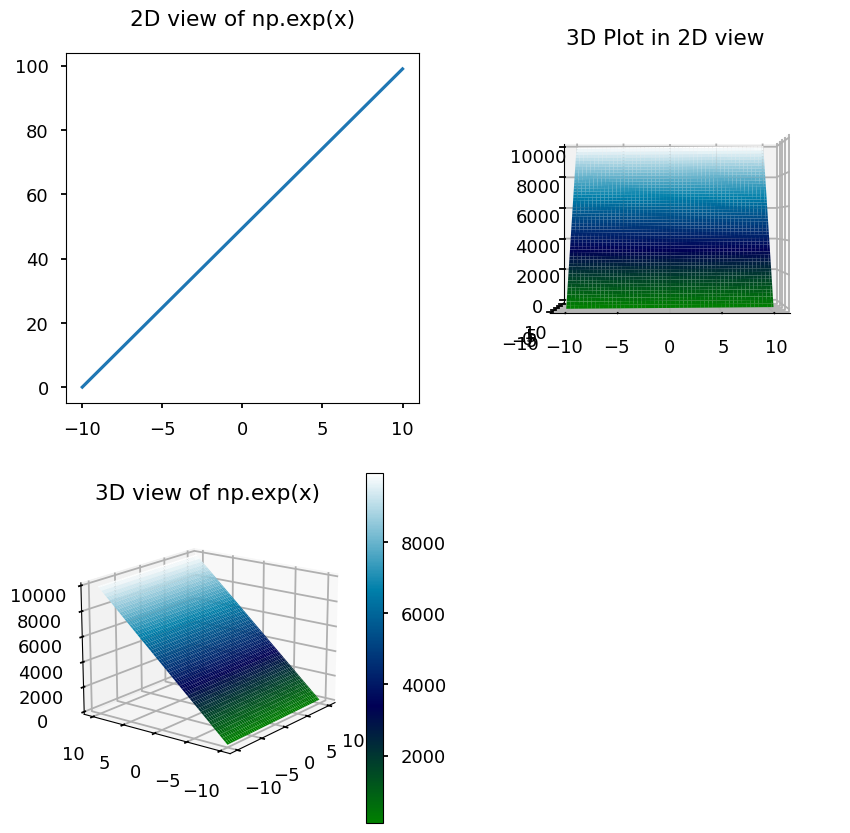

In [7]:
x = y = np.linspace(-10, 10, 100)  # x1, y1 are not pointing to the same Array.
xx, yy = np.meshgrid(x, y)
zz = np.arange(x.shape[0]**2).reshape((100, 100)) # Bottom-Left Corner (-10, -10) => 100 + 100 = 200(the highest point of Z axis)

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(x, np.arange(x.shape[0]))   # By this we can know how our 3D plot looks in 2D plot. ALWAYS CREATE THE 2D PLOT OF 'zz' first.
ax1.set_title("2D view of np.exp(x)", pad=20)

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.plot_surface(xx, yy, zz, cmap='ocean')
ax2.set_title("3D Plot in 2D view")
ax2.view_init(0, -90)

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
p = ax3.plot_surface(xx, yy, zz, cmap='ocean')
fig.colorbar(mappable=p, ax=ax3)
ax3.set_title("3D view of np.exp(x)")
ax3.view_init(17, -143)
plt.show()

```js
There are 2 types of data, Numerical and Categorical.
There are 3 types of Analysis in terms of Data Visualization, Univariate(Plotting only on 1 column), Bivariate(Plotting on 2 columns), Multivariate(Plotting on more than 2 columns)
```

#                                                               plot
[For more info](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

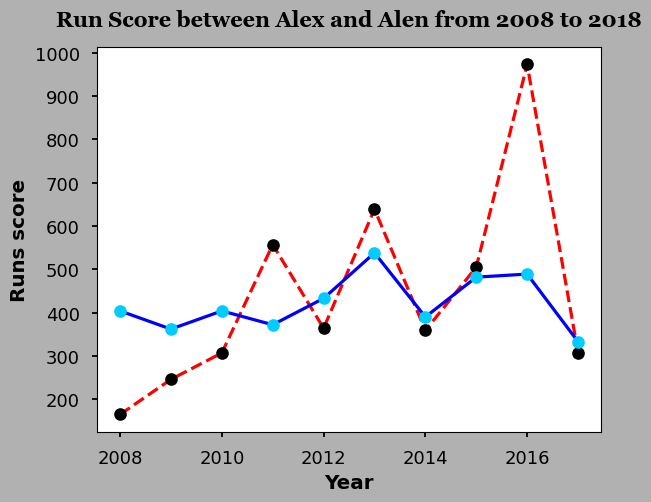

In [2]:
df = pl.read_csv(r"d:\Datasets\CampusX\batsman-score.csv") # 2 batsman scores based on a 'year', columns = year, Alex, Alen.

fig = plt.figure(figsize=(6.5, 5))
fig.patch.set_facecolor('None')  # below WHOLE figure's axis bgcolor, patch is the background of axis.
fig.patch.set_alpha(0.3)

plt.title(label='Run Score between Alex and Alen from 2008 to 2018', pad=15, fontweight='bold', fontname='Georgia')
plt.xlabel('Year',       color='black', fontweight='bold')
plt.ylabel('Runs score', color='black', fontweight='bold')
plt.plot('year', 'Alex', data=df, color='red',  marker='o', linestyle='--', linewidth=2.3, markerfacecolor='black')
plt.plot('year', 'Alen', data=df, color='blue', marker='o', linestyle='-',  linewidth=2.3, markerfacecolor='#00ccff')
plt.show() # marker(shape)= o, >, <     linestyle= -, --, :, -.
# plt.plot(df['year'], df['Alex'])     ==     plt.plot('year', 'Alex', data=df)

#                                                     legend
```js
        Syntax : plt.legend(loc='best') // 'best' is default for loc.

        plt.legend() :
        --------------
                plt.plot(......., label='any_name')
                plt.legend() // writing only label=.. won't work unless you call legend() afterwards.
                plt.show()
        
        plt.legend(loc='best'):
        -----------------------
                'best' => Matplotlib will automatically select the BEST place (with empty space) to place the legend.
                For custom loc : 'upper left', 'upper right', 'lower left', 'lower right' etc.

'WARNING' : Lets say you provided/not_provided 'label' parameter to scatter()/plot().... and now if you call legend() at the end, for each line/scatter_plot/... you will see a tag/legend. But what if we want specific legends to show. In that case :

                        plt.scatter(......., label='_nolegend_')
                        plt.plot(......)   // Only this plot()'s legend will be shown.
                        plt.legend()
```
[For more info](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)

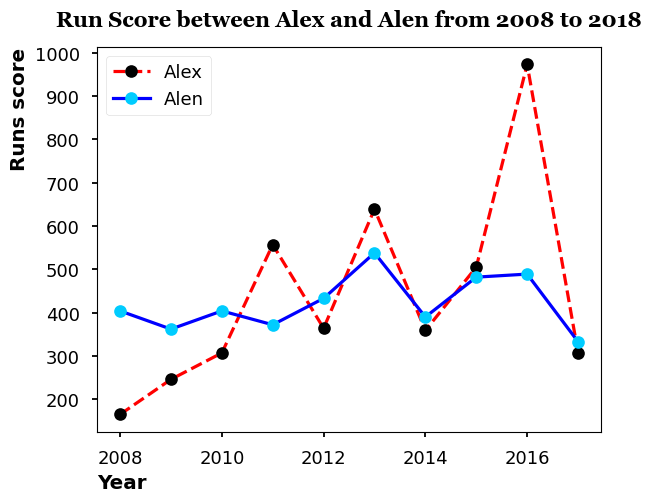

In [3]:
df = pl.read_csv(r"d:\Datasets\CampusX\batsman-score.csv") # 2 batsman scores based on a 'year', columns = year, Alex, Alen.

plt.figure(figsize=(6.5, 5))
plt.title(label='Run Score between Alex and Alen from 2008 to 2018', pad=15, fontweight='bold', fontname='Georgia')
plt.xlabel('Year',       color='black', fontweight='bold', loc='left')
plt.ylabel('Runs score', color='black', fontweight='bold', loc='top' )

plt.plot('year', 'Alex', data=df, color='red',  marker='o', linestyle='--', linewidth=2.3, markerfacecolor='black',   label='Alex')
plt.plot('year', 'Alen', data=df, color='blue', marker='o', linestyle='-',  linewidth=2.3, markerfacecolor='#00ccff', label='Alen')

plt.legend()
# plt.legend(['Alex', 'Alen']) # another way to weite this
plt.show() # marker(shape)= o, >, <     linestyle= -, --, :, -.

# xlimit, ylimit, grid

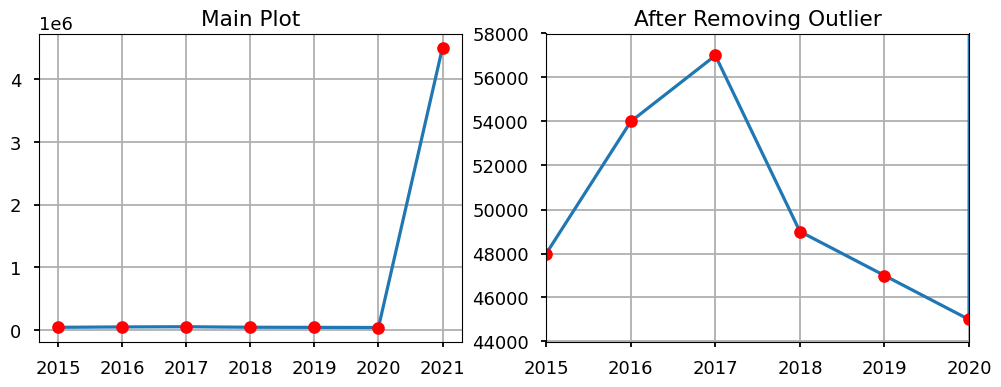

In [4]:
price = [48000, 54000, 57000, 49000, 47000, 45000, 4500000] # 4500000 is outlier here since its much bigger than others.
year  = [2015,  2016,  2017,  2018,  2019,  2020,  2021] 

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('Main Plot')
plt.plot(year, price, marker='o', linewidth=2.3, markerfacecolor='red')
plt.grid() # only for the figure (1, 2, 1).

plt.subplot(1, 2, 2)
plt.title('After Removing Outlier')
plt.plot(year, price, marker='o', linewidth=2.3, markerfacecolor='red')
plt.ylim(min(price[:-1]) - 1000, max(price[:-1]) + 1000) # plots without the outlier.
plt.xlim(2015, 2020) # only from the year 2015 to 2020. To use ylim(), xlim() is not mandatory.
plt.grid() # only for the figure (1, 2, 2).

plt.show()

```js
'Main Plot' : From 2015 to 2020 we see a flat looking line. Since outlier here is 45_00000, very big than any other values, so the actual graph of 'Without Outlier' here seeming very small and flat but is actually the 2nd graph where we plot the 'Main Plot' graph as it is but we limit the X and Y axis both so we can have the graph without Outlier 'price' and 'year' but Outlier exists, its just we cant see it here due to xlimit() and ylimit().
```

#                                               Scatter Plot
```js
        Its nothing but the 'points' that creates a 2d Line (if possible) in plt.plot().
```

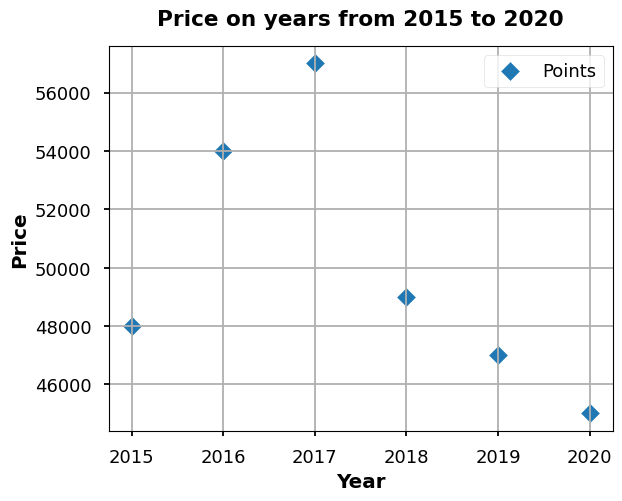

In [5]:
price = [48000, 54000, 57000, 49000, 47000, 45000]
year  = [2015,  2016,  2017,  2018,  2019,  2020]

plt.figure(figsize=(6.5, 5))
plt.title("Price on years from 2015 to 2020", pad=15, fontweight='bold')
plt.xlabel("Year",  fontweight='bold')
plt.ylabel("Price", fontweight='bold')
plt.scatter(x=year, y=price, marker='D', label='Points')

plt.legend()
plt.grid()
plt.show()

```js
From that above 'Scatter Plot' we can say from Year 2015 to 2017, we had the PRICE INCREASED, but then from 2018 to 2020 the PRICE DECREASED. Using plt.plot() would be best here since we can create the 2d Line here. Scatter Plot is needed when we can't create 2d line using the Points but still wa want to see how the Points is spread(Variance) or for other stuffs.
```

#                                           Scatter Plot with Different Size's Points.

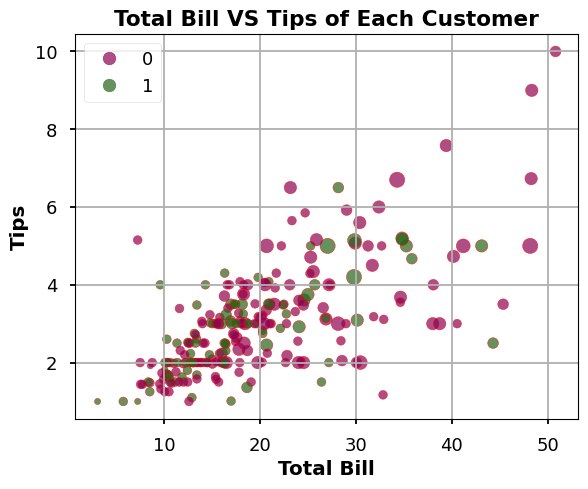

In [152]:
tips = ( pl.DataFrame(sns.load_dataset('tips'))
        .with_columns(minutes = col('size') * 20,
                      label   = col('sex').to_physical()) )
'''
tips :
┌────────────┬──────┬────────┬────────┬─────┬────────┬──────┬─────────┬───────┐
│ total_bill ┆ tip  ┆ sex    ┆ smoker ┆ day ┆ time   ┆ size ┆ minutes ┆ label │
│ ---        ┆ ---  ┆ ---    ┆ ---    ┆     ┆ ---    ┆ ---  ┆ ---     ┆ ---   │
│ f64        ┆ f64  ┆ cat    ┆ cat    ┆     ┆ cat    ┆ i64  ┆ i64     ┆ u32   │
╞════════════╪══════╪════════╪════════╪═════╪════════╪══════╪═════════╪═══════╡
│ 16.99      ┆ 1.01 ┆ Female ┆ No     ┆ Sun ┆ Dinner ┆ 2    ┆ 40      ┆ 1     │
│ 10.34      ┆ 1.66 ┆ Male   ┆ No     ┆ Sun ┆ Dinner ┆ 3    ┆ 60      ┆ 0     │
│ 21.01      ┆ 3.5  ┆ Male   ┆ No     ┆ Sat ┆ Dinner ┆ 3    ┆ 60      ┆ 0     │
│ 23.68      ┆ 3.31 ┆ Male   ┆ No     ┆ Sun ┆ Dinner ┆ 2    ┆ 40      ┆ 0     │
│ 24.59      ┆ 3.61 ┆ Female ┆ No     ┆ Mon ┆ Dinner ┆ 4    ┆ 80      ┆ 1     │
└────────────┴──────┴────────┴────────┴─────┴────────┴──────┴─────────┴───────┘

plt.scatter(x='total_bill', y='tip', data=tips) returns a Scatter Chart of Each person's total_bill and the amount of their tips.

plt.scatter(x='total_bill', y='tip', data=tips) will give us a Scatter Plot where every Point/Dot has the SAME SIZE. But what if
lets say I want DIFFERENT SIZES POINTS where each Point's Size will denote how much each customer SPEND THEIR TIME on 
that restaurent. We can do it using the 's' parameter which stands 'size'. The BIGGER the size, the more time a customer spent.

Each Point is an information of a Customer who is Male or Female. If we want the Points to be different colors based on their sex/
gender, then we have to provide a "Numerical Version"(tips['label']) of the column "sex" which is the Parameter "c", "c" also
stands 'color' but we don't want A Single Color, we want DIFFERENT COLORS based on their Gender/Sex info.
        |
        |── After setting the parameter 'c', now we set our colors by 'cmap' parameter. For reading the 'cmap' values, read
            [https://matplotlib.org/stable/users/explain/colors/colormaps.html]
'''

plt.figure(figsize=(6.5, 5))
plt.title("Total Bill VS Tips of Each Customer", fontweight='bold')
plt.xlabel("Total Bill", fontweight='bold')
plt.ylabel("Tips",       fontweight='bold')
scatter = plt.scatter(x='total_bill', y='tip', data=tips, s='minutes', c='label', cmap='PiYG', edgecolors='red', alpha=0.7)
# if you don't use data=tips, then for x, y, s, c you've to use like tips['tip'].

plt.legend(*scatter.legend_elements())
plt.grid(axis='both')

plt.show()

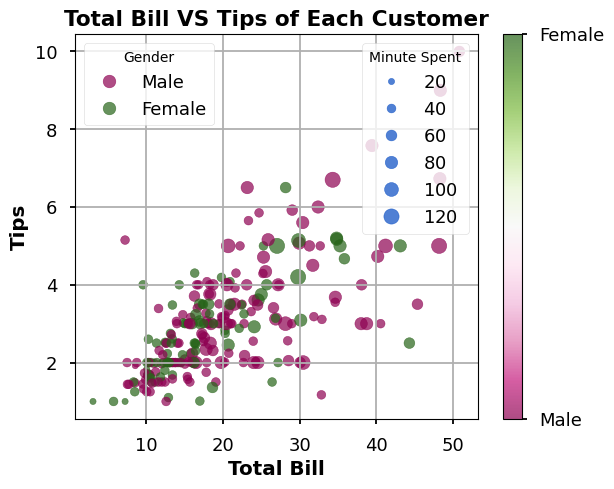

In [154]:
# Instead of 0, 1 we want to display Male instead of 0, Female for 1. Also What each Point Size denotes how many minutes spent by
# a customer.


legend_dict = {0 : 'Male', 1 : 'Female'}

plt.figure(figsize=(6.5, 5))
plt.title("Total Bill VS Tips of Each Customer", fontweight='bold')
plt.xlabel("Total Bill", fontweight='bold')
plt.ylabel("Tips",       fontweight='bold')

scatter = plt.scatter(x='total_bill', y='tip', data=tips, s='minutes', c='label', cmap='PiYG', alpha=0.7)

handles, labels = scatter.legend_elements() # labels = ['$\\mathdefault{0}$', '$\\mathdefault{1}$']
labelsNums = [int(label.strip('$\\mathdefault{}')) for label in labels] # [0, 1] : Not guaranteed to be sorted always, keep it as scatter created "labels".
nLabels = len(labelsNums)
new_labels = [legend_dict[label] for label in labelsNums] # [Male, Female]
legend1 = plt.legend(handles, new_labels, loc='upper left', title='Gender')  
plt.gca().add_artist(legend1) # To display 1st plt.legend() on the current axes (gca=get current axes). Else only the below legend() will be displayed.

plt.legend(*scatter.legend_elements(prop='sizes', c='#064bc2', alpha=0.7), loc='upper right', title='Minute Spent')

# Adjust Colorbar.  To understand the below line, see [e.png] in this Matplotlib folder.
# cbar = plt.colorbar(scatter, boundaries=np.linspace(0, nLabels>>1, num=nLabels+1), ticks=[0, 1])  # Ticks for Male/Female
# cbar.set_label('Gender')     #-------------------- [0, 0.5, 1] ------------------  #------- [0, 1] --------
ticks = sorted(labelsNums)
cbar = plt.colorbar(scatter, ticks=ticks)
cbar.set_ticklabels([legend_dict[label] for label in ticks]) # [Male, Female]

plt.grid(axis='both')
plt.show()

#                                               Creating Scatter Plot using plot()
```js
Creating Scatter Plot Using plot() is fast, scatter() is slow for LARGE DATASETS if you work with parameter 's' where obviously it takes time to size each Point differently. Inside plot() we can't use all the functionalities scatter() provides like 's' etc.

scatter() is useful for small datasets since we won't create 1 million Points with DIFFERENT SIZES, with DIFFERENT COLORS in a small graph for no stupid reason.
```

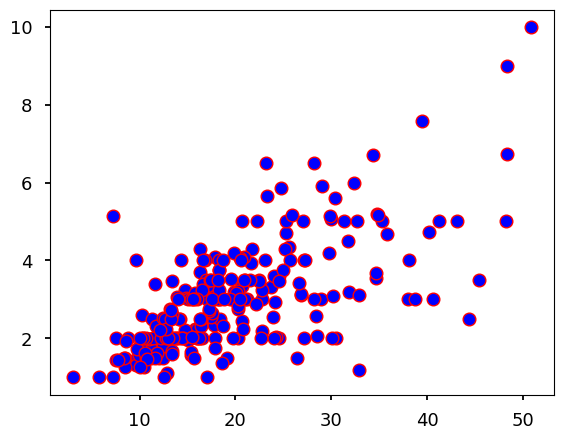

In [8]:
tips = pl.DataFrame(sns.load_dataset('tips')) # pl.DataFrame(pandas_dataframe)

plt.figure(figsize=(6.5, 5))
plt.plot('total_bill', 'tip', 'o', data=tips, markerfacecolor='blue', markeredgecolor='red', markeredgewidth=1)
# 'o' is not marker='o'. markeredgecolor='red' works if 'markeredgewidth' is set.
plt.show()

#                                           Bar Chart
```js
        Syntax : plt.bar(x      = values to be put in 'x' axis,
                         height = values to be put in 'y' axis,
                         width  = the width of each bar, 'default = 0.8',
                         data   = dataframe. Mandatory if x or/and height are column_name, not df[column_name],
                         **kwargs
                        ) (There's another parameter name 'bottom', we'll learn how to use this in the "Stack Bar Chart" section)
        
        This is 'Vertical Bar Chart' where each bar standing on the X axis.
```

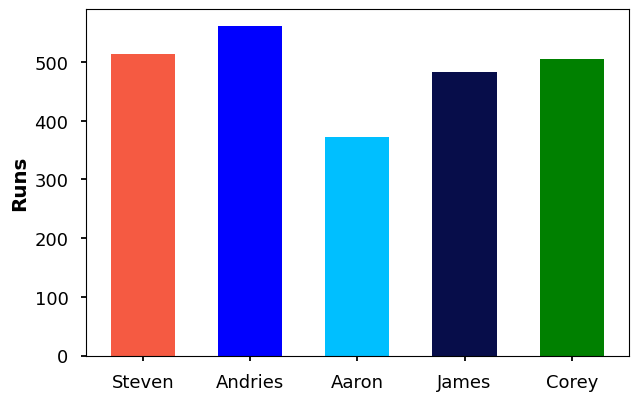

In [9]:
df1 = pl.read_csv(r"d:\Datasets\CampusX\batsman_season_record.csv") # batsman	2015	2016	2017
colors = ['#f55a42', 'blue', '#00bfff', '#070d4a', 'green']

plt.figure(figsize=(7, 4.5))
plt.bar(x='batsman', height='2015', data=df1, width=0.6, color=colors)
# plt.bar('batsman', '2015', data=df1, width=0.6 color=colors)  # for simplicity
plt.ylabel("Runs", fontweight='bold')
plt.show()

#                                           Bar Chart Horizontally
```js
        Syntax : plt.barh(y, width, height, data, **kwargs)
                 plt.barh() is totally the oposite of plt.bar().

        This is 'Horizontal Bar Chart' where each bar standing on the Y axis.
```

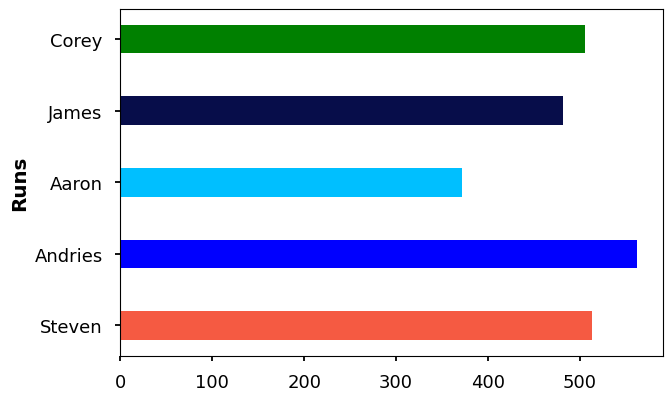

In [10]:
df1 = pl.read_csv(r"d:\Datasets\CampusX\batsman_season_record.csv") # batsman	2015	2016	2017
colors = ['#f55a42', 'blue', '#00bfff', '#070d4a', 'green']

plt.figure(figsize=(7, 4.5))
plt.barh(y='batsman', width='2015', data=df1, height=0.4, color=colors)
# plt.barh('batsman', '2015', data=df1, height=0.4, color=colors)  # for simplicity
plt.ylabel("Runs", fontweight='bold')
plt.show()

#                                               Multiple Bar Charts

```js  
        (This is a little complex analysis since we don't have direct way to Draw Multiple Bar Charts, so start from here.)

        We have implemented Bar Chart above of 'Categorical VS Numerical' and vice versa. Below an example of 'Numerical VS Numerical' Bar Chart.

        The difference is, in 'Categorical VS Numerical' on X Axis there are Categorical values which Matplotlib arrange ON ITS OWN. But in 'Numerical VS Numerical' on X Axis there are Numerical values which are Specific Points that we want to be on the X axis.
```

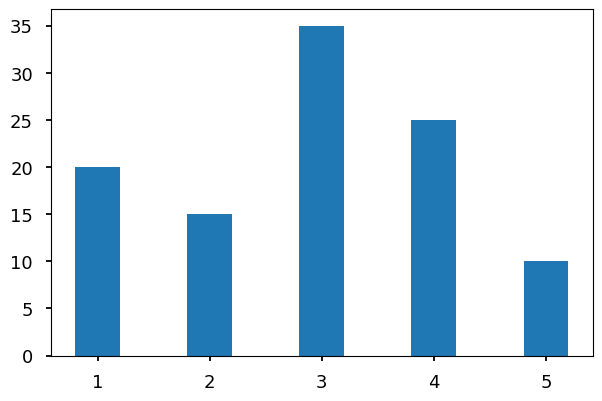

In [11]:
line_no = np.arange(1, 6)
wait_time = [20, 15, 35, 25, 10]

plt.figure(figsize=(7, 4.5))
plt.bar(line_no, wait_time, width=0.4)
plt.show()

extra_info = '''
Below : 1 residing in the middle of the bar, same for other Points. Width of each bar is 0.4. Means 1's Left Part is 0.2 and
right part is other 0.2.
'''

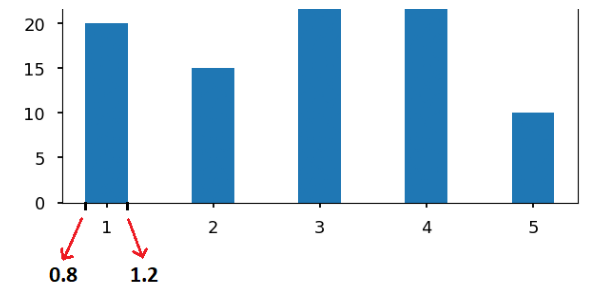

In [12]:
image = plt.imread(r"D:\VS CODE\Data Science\matplotlib\a.png")
plt.figure(figsize=(7.5, 4.5))
plt.imshow(image)
plt.axis('off')
plt.show()

explanation = '''
Since each bar's width is 0.4, so 1(/2/3/4/5)'s left and right both are 0.2.  ( 1 - 0.2 = 0.8,   1 + 0.2 = 1.2 )
Now what if we want to draw Bar on 0.8 and 1.2? (See the below code block)
'''

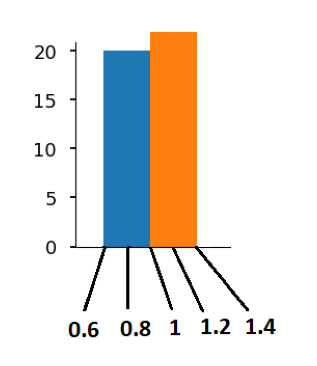

In [13]:
image1 = plt.imread(r"D:\VS CODE\Data Science\matplotlib\b.png")
plt.figure(figsize=(7.5, 4.5))
plt.imshow(image1)
plt.axis('off')
plt.show()

explanation = '''
The main code to draw this is : (line_no = 1, wait_time1 = 20, wait_time1 = 25)

                                plt.bar(line_no - 0.2, wait_time1, width=0.4)
                                plt.bar(line_no + 0.2, wait_time2, width=0.4)

The Blue Bar on 0.8 will occupy 0.6 -> 0.8 <- 1.0  BECAUSE we set width = 0.4 means 0.8's left and right both occupies 0.2 width
(see the below graph). Now if we want the Orange Bar starts from 1.0 to make sure both Bars sticks together with NO SPACE with
SAME WIDTH(0.4), we've to add BAR'S LEFT/RIGHT WIDTH(0.2) with 1 to get A Point from where the LEFT AND RIGHT width is 0.2 and in
total 0.4 width. 1 + 0.2 = 1.2. That is the reason to add 0.2 with 1 to get the Orange Bar.

So we subtracted 0.2 from 1 and we draw the Blue 0.8 Bar. Then we added 0.2 with 1 and draw the Orange 1.2 Bar.
Now if we want to draw this for each Point, then first we've to subtract 0.2 from 'line_no' array and draw the Blue Bars. Then
addd 0.2 to get the Orange Bars (See the below code block).
'''

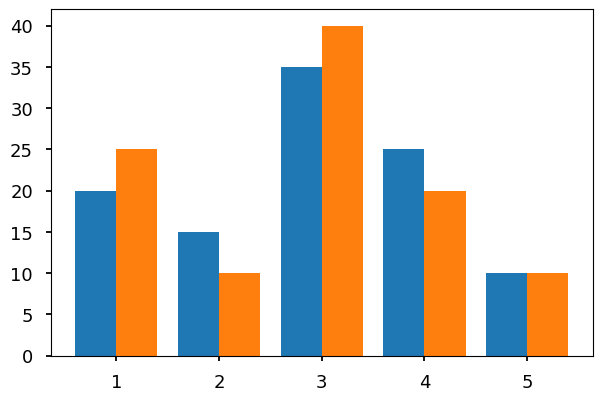

In [14]:
line_no = np.arange(1, 6)
wait_time1 = [20, 15, 35, 25, 10]
wait_time2 = [25, 10, 40, 20, 10]

plt.figure(figsize=(7, 4.5))
plt.bar(line_no - 0.2, wait_time1, width=0.4)
plt.bar(line_no + 0.2, wait_time2, width=0.4)
plt.show()

explanation = """
But how do we figure out that what is my Width should be and how much I've to subtract and add? (See the below code block)
"""

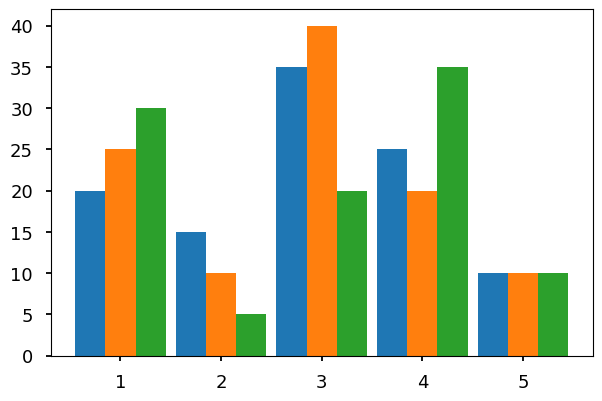

In [15]:
explanation = ''''
Step 1 :
--------
At the above image, we had Points 1, 2, 3, 4, 5. For each Point we've drawn 2 Bars with total space of 2 * 0.4 = 0.8.
So now for drawing 3 bars for each Point we need 0.4 * 3 = toal 1.2 space but the difference between each Point is 1. That means
we can't take Width 0.4. 0.3 * 3 = 0.9, means we can take Width of each bar is 0.3.

Step 2 :
--------
For 1 : Lets make 1 itself a Middle Point of a Bar. Since each bar's Half Width = 0.15, so 1's Left Width is 0.15 (for Right Width
as well). Now lets go Left by 0.15 alongside Right (See 'c.png' in that "matplotlib" Folder). As we can see that Left Bar is
2 * 0.15 = 0.30 away from the Point 1 alongside Right Bar. So our three points are : 1 - 0.3, 1 and 1 + 0.3 .

Warning : If lets say we have two points : 3, 3.5. Now we need at least 0.9 difference but here the difference is 0.5. That means
          we can't trust the 'line_no' unless its like [1, 2, 3, 4 ....]
'''

line_no = np.arange(1, 6)
wait_time1 = [20, 15, 35, 25, 10]
wait_time2 = [25, 10, 40, 20, 10]
wait_time3 = [30,  5, 20, 35, 10]

plt.figure(figsize=(7, 4.5))
plt.bar(line_no - 0.3, wait_time1, width=0.3)
plt.bar(line_no      , wait_time2, width=0.3)
plt.bar(line_no + 0.3, wait_time3, width=0.3)
plt.show()

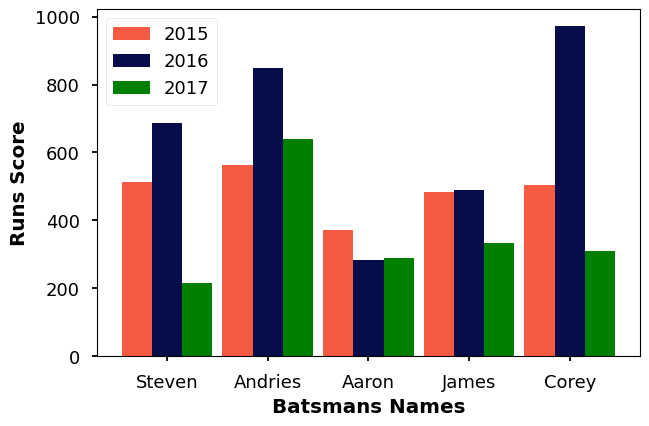

In [16]:
#                           Implementing Multiple Bar Charts from csv dataset
#  For each batsman, we want to draw 3 Bars representing their Runs Score of year 2015, 2016 and 2017.
#  In the X axis there will be Batsmans Names i.e. df2['batsman'] but to draw 3 Bars for each batsman we first have to put
#  something like [1, 2, 3, 4, 5] in the X axis which we saw why in the previous code block.

df2 = pl.read_csv(r"d:\Datasets\CampusX\batsman_season_record.csv") # batsman	2015	2016	2017
x = np.arange(1, df2['batsman'].shape[0] + 1) # Height of the df2 = Number Of Batsman

plt.figure(figsize=(7, 4.5))

plt.bar(x - 0.3, '2015', data=df2, width=0.3, color='#f55a42')
plt.bar(x      , '2016', data=df2, width=0.3, color='#070d4a')
plt.bar(x + 0.3, '2017', data=df2, width=0.3, color='green'  )
'''
The problem here is, in the X axis now we'll see 1, 2, 3, 4, 5 which is 'x'. But instead of these, we want to put Batsmans names
i.e. df2['batsman']. For this we have xticks(locations_on_X_axis, values_to_set_on_ticks).
'''
plt.xticks(x, df2['batsman'])
plt.xlabel('Batsmans Names', fontweight='bold')
plt.ylabel("Runs Score"    , fontweight='bold')
plt.legend(["2015", "2016", "2017"] )
plt.show()

#                                           xticks, yticks
```js
        Syntax : plt.xticks(ticks    = locations_on_X_axis,    --> Current values on X axis OR New values.
                            labels   = values_to_set_on_ticks, --> Could be 'ticks' itself or ANY OTHER VALUES.
                            rotation = the values direction in degree.
                           )
                           
                 plt.yticks(... same as xticks() but instead of 'x', its 'y' here.)
```

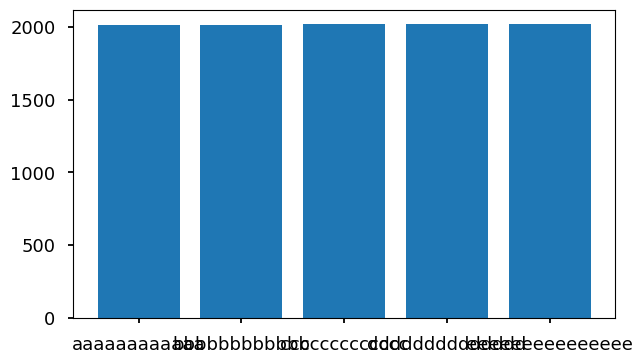

In [17]:
year  = [2015,  2016,  2017,  2018,  2019]
chars = ['aaaaaaaaaaaa', 'bbbbbbbbbbbb', 'ccccccccccccc', 'dddddddddddddd', 'eeeeeeeeeeeeeee']

plt.figure(figsize=(7, 4))
plt.bar(chars, year)
plt.show()

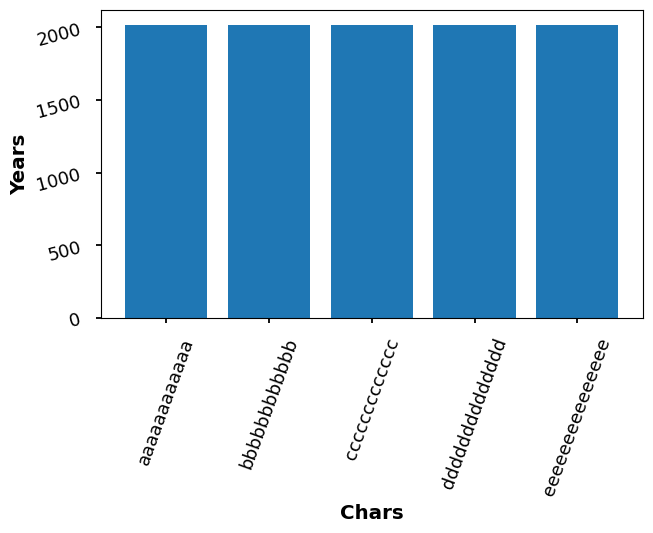

In [18]:
"""
Above Figure : As you can see, on X axis the 'chars' values are overlapping. That's where xticks helps us. See the Below Graph.
As you can see our plt.figure(figsize=(7, 5)) still okay but the values of 'chars' are now more readable. Matplotlib takes as
much space needed to make them readable like this.
"""

year  = [2015,  2016,  2017,  2018,  2019]
chars = ['aaaaaaaaaaaa', 'bbbbbbbbbbbb', 'ccccccccccccc', 'dddddddddddddd', 'eeeeeeeeeeeeeee']

plt.figure(figsize=(7, 4))
plt.bar(chars, year)

plt.xticks(rotation = 70)
plt.yticks(rotation = 15)

plt.xlabel("Chars", fontweight='bold')
plt.ylabel('Years', fontweight='bold')
plt.show()

#                                   Stack Bar Chart
```js
        plt.bar(x      = values to be put in 'x' axis,
                height = values to be put in 'y' axis,
                width  = the width of each bar, 'default = 0.8',
                data   = dataframe. Mandatory if x or/and height are column_name, not df[column_name],
                bottom = read the below 2 code blocks and you would understand what 'bottom' does.
                **kwargs
               )
```

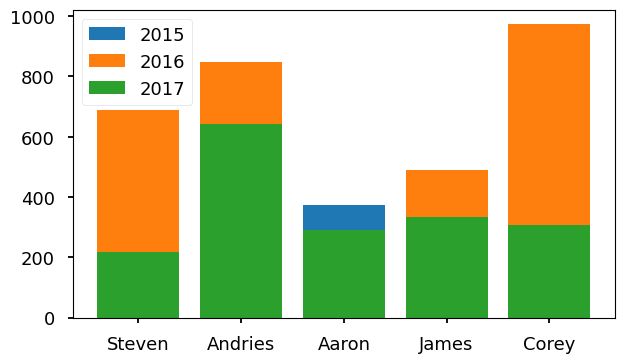

In [19]:
df2 = pl.read_csv(r"d:\Datasets\CampusX\batsman_season_record.csv") # batsman	2015	2016	2017

plt.figure(figsize=(7, 4))
plt.bar('batsman', '2015', data=df2)
plt.bar('batsman', '2016', data=df2)
plt.bar('batsman', '2017', data=df2)

plt.legend(['2015', '2016', '2017'])
plt.show()

explanation = """
    From below graph we can see the Bars are overlapping because the X axis are same.
df2 :
-----
    ┌─────────┬──────┬──────┬──────┐
    │ batsman ┆ 2015 ┆ 2016 ┆ 2017 │
    │ ---     ┆ ---  ┆ ---  ┆ ---  │
    │ str     ┆ i64  ┆ i64  ┆ i64  │
    ╞═════════╪══════╪══════╪══════╡
    │ Steven  ┆ 513  ┆ 687  ┆ 216  │
    │ Andries ┆ 562  ┆ 848  ┆ 641  │
    │ Aaron   ┆ 372  ┆ 284  ┆ 290  │
    │ James   ┆ 482  ┆ 489  ┆ 333  │
    │ Corey   ┆ 505  ┆ 973  ┆ 308  │
    └─────────┴──────┴──────┴──────┘

Lets say for batsman Steven we want to draw a bar of his TOTAL RUN of years 2015, 2016 and 2017 i.e. 513 + 687 + 216 = 1416.
But like 'd.png'(in this Matplotlib folder) where the bar is the SUM(1416) but in Three DIFFERENT Parts :

                            1. Blue  part is of 2015 year,
                            2. Red   .......... 2016 ....,
                            3. Green .......... 2017 .....

This bar('d.png') seems a Stack of 3 Parts :
                            1. BLUE part is the ground,
                            2. RED part's   BOTTOM is BLUE,
                            3. GREEN part's BOTTOM is RED + BLUE, not just RED.

Now see the below code block and you will understand by yourself.
"""

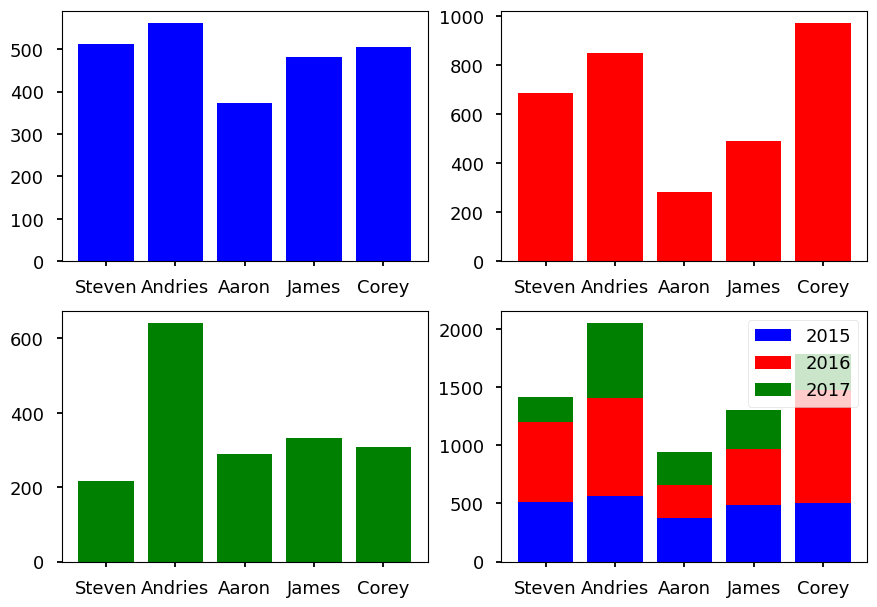

In [20]:
df2 = pl.read_csv(r"d:\Datasets\CampusX\batsman_season_record.csv") # batsman	2015	2016	2017
gs = GridSpec(nrows=2, ncols=2)

plt.subplot(gs[0, 0])
plt.bar('batsman', '2015', data=df2, color='blue')

plt.subplot(gs[0, 1])
plt.bar('batsman', '2016', data=df2, color='red')

plt.subplot(gs[1, 0])
plt.bar('batsman', '2017', data=df2, color='green')

plt.subplot(gs[1, 1]) # The last graph is the Stack Bar.
plt.bar('batsman', '2015', data=df2, color='blue')
plt.bar('batsman', '2016', data=df2, color='red'  , bottom='2015') # or df2['2015'].
plt.bar('batsman', '2017', data=df2, color='green', bottom=df2['2015'] + df2['2016']) # '2015' + '2016' is invalid.
plt.legend(['2015', '2016', '2017'])
# plt.grid()

plt.show()

#                                                   Histogram
```js
        Histogram is nothing but e.g. [1, 2, 1, 3, 1]'s frequency on the Y axis and the values are on X axis.
        Its Univariate Analysis : Since we work on only one column.
```

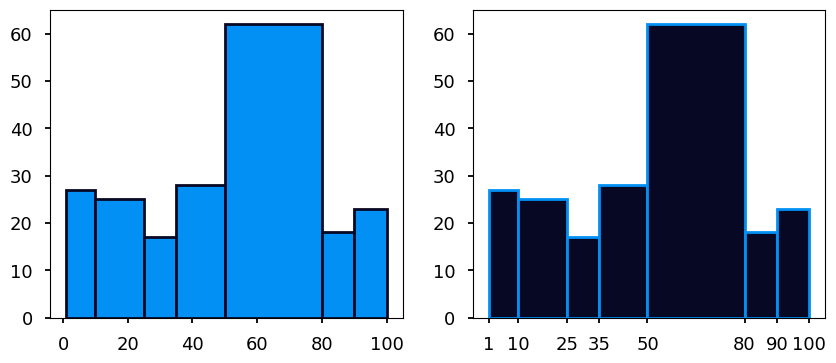

In [3]:
a = np.random.randint(low=1, high=100+1, size=(200,))
bins_edges = [1, 10, 25, 35, 50, 80, 90, 100] # 1st and last values are a.min()-n and a.max()+m. n = m = 0, 1, 2 .. e.g.
                                              # a.min() = 1 but we want 0, a.max() = 100 but we want 111 to have a
plt.figure(figsize=(10, 4))                   # PREFERRED SEQUENCE AND 1 and 100 are also being COVRERED.

plt.subplot(1, 2, 1)
plt.hist(a, bins=bins_edges, color='#0290f5', edgecolor='#070824', linewidth=2)

plt.subplot(1, 2, 2)
plt.hist(a, bins=bins_edges, color='#070824', edgecolor='#0290f5', linewidth=2)
plt.xticks(ticks=bins_edges, labels=bins_edges)

plt.show()
explanation = """
In 1st Graph, bins = [1, 10, 25, 35, 50, 80, 90, 100] and the bins edges are also this which we can see in 2nd Graph. But 
matplotlib showed values like [0, 20, 40, 60, 80, 100] in the first graph but again the bars are okay. To fix the values
drawn on the X axis in 1st Graph by matplotlib, we can use xticks(new_loction_of_the_ticks, values_to_be_set_on_ticks).
"""

#                                               Log Histogram

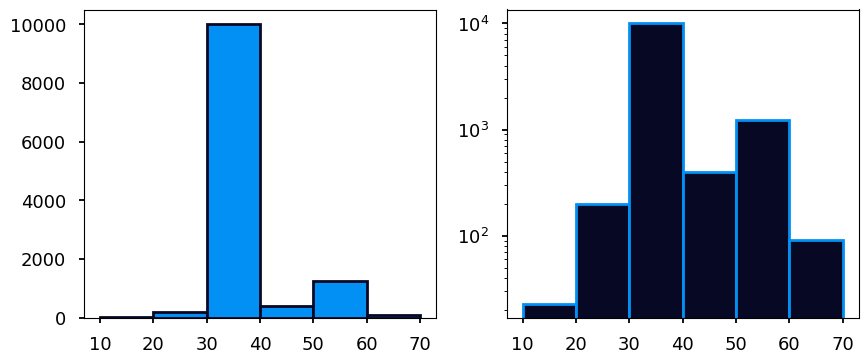

In [22]:
arr: np.ndarray = np.load(r"d:\Datasets\CampusX\big-array.npy")
bins_edges = [10, 20, 30, 40, 50, 60, 70]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(arr, bins=[10, 20, 30, 40, 50, 60, 70],           color='#0290f5', edgecolor='#070824', linewidth=2)
plt.xticks(bins_edges, bins_edges)

plt.subplot(1, 2, 2)
plt.hist(arr, bins=[10, 20, 30, 40, 50, 60, 70], log=True, color='#070824', edgecolor='#0290f5', linewidth=2)
plt.xticks(bins_edges, bins_edges)

plt.show()

explanation = """
1st Graph : In [10-20] there are around 10 values but since we have a LARGE VALUE, 10_000, that 10 won't be shown on the Y axis.
            Currently on Y axis we have 0, 2000, 4000, 6000, 8000, 10_000 and values from 2000 - 10_000 belongs to only One Bar.
            What if we could set values on Y axis like 0, 100, 1000, 10_000? Now see the 2nd Graph. Now Bar Values under 2000 is
            being shown beautifully.                   |___________________|
                                                             Log Values
"""                      

#                                   Pie Chart
```js
        plt.pie(x       = values for we will Pie Chart,
                labels  = the same label used for plt.legend(),
                explode = e.g. [10, 25, 35], we want to separate the 2nd part a little, so explode = [0, 0.1, 0]
                autopct = Display how much each value occupying in the Pie Chart.
               )
```

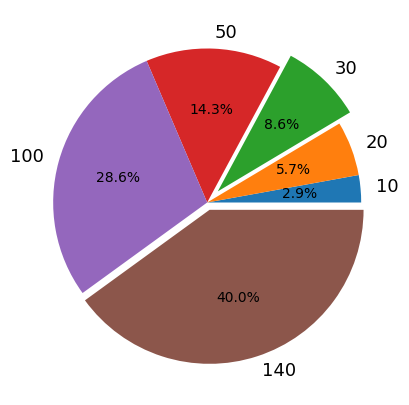

In [23]:
values = [10, 20, 30, 50, 100, 140] # Separated the 3rd and 6th Chart below a little.

plt.figure(figsize=(5, 5))
plt.pie(values, labels=values, explode=[0, 0, 0.1, 0, 0, 0.05], autopct="%0.1f%%") # 0.1 means 1 decimal value after dot, '.'.
plt.show()

#                                                       Annotations
```js
        Syntax : plt.text(x = Numerical_value,
                          y = Numerical_value,
                          s = String,
                          **kwargs (ha, va, rotation, wrap ....)   [ha = horizontalalignment, va=veticalalignment]
        
        Ex :        x = [1, 5, 7],
                    y = [4, 7, 9]
                    plt.scatter(x, y)

                Now lets say for the First Point, (1, 4) we want to put a Text('first') on this point. For this :
                    plt.text(x=1, y=4, s='first')
        
        Warning :
                    ha = 'left' means the text will be put 'right' horizontally. Yes, here except 'center', 'left' works as 'right',
                                                                                                            'bottom' ||  ||  'top'.

        [more on text()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html)
```

shape: (5, 4)
┌───────────┬──────┬───────────┬─────────────┐
│ batter    ┆ runs ┆ avg       ┆ strike_rate │
│ ---       ┆ ---  ┆ ---       ┆ ---         │
│ str       ┆ i64  ┆ f64       ┆ f64         │
╞═══════════╪══════╪═══════════╪═════════════╡
│ V Kohli   ┆ 6634 ┆ 36.251366 ┆ 125.977972  │
│ S Dhawan  ┆ 6244 ┆ 34.882682 ┆ 122.840842  │
│ DA Warner ┆ 5883 ┆ 41.429577 ┆ 136.401577  │
│ RG Sharma ┆ 5881 ┆ 30.314433 ┆ 126.964594  │
│ SK Raina  ┆ 5536 ┆ 32.374269 ┆ 132.535312  │
└───────────┴──────┴───────────┴─────────────┘


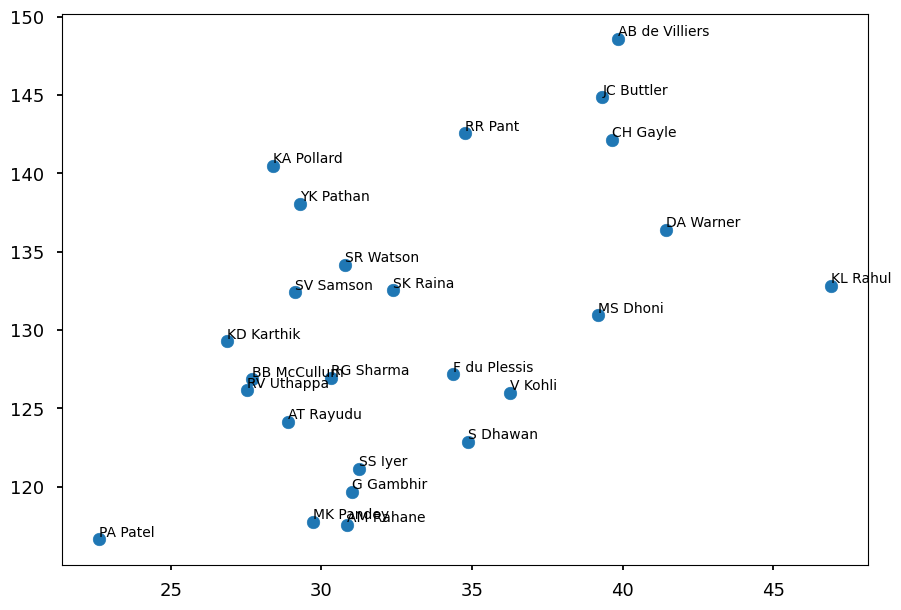

In [53]:
df3 = pl.read_csv(r"d:\Datasets\CampusX\batter.csv").limit(25)
print(df3.limit(5))

plt.scatter('avg', 'strike_rate', data=df3)
for i in range(25):
    plt.text(x=df3['avg'][i], y=df3['strike_rate'][i], s=df3['batter'][i], ha='left', va='bottom', wrap=True)
plt.show()

#                                           plt.axhline(), plt.axvline()
```js
        Syntax for axhline(y    = "The STARTING point on 'Y' axis from where the HORIZONTAL LINE will be created",
                           xmin = float value, (xmin -> xStartPoint)
                           xmax = float value, (xmax -> xEndPoint  )
                           **kwargs
                          )
        
        What is 'xmin' and 'xmax'? : (Read this explanation after running axhline(y=..) in the below code)
        ----------------------------
        By default, xmin = the 'Starting Point' of the Matplotlib Graph and xmax = the 'Ending Point'.

        Look at 'f.png' in this matplotlib folder. We have a Horizontal Line(Yellow color) and a Vertical Line(Purple Color).
        Another Horizontal Line(Red color) created from the Y axis, 141.5. But we want the xMax/xEnd of this Horizontal Line to be 35. So you are thinking to write : xmax = 35, but you will see no change. Why?
        On the X axis, 35 is around the Center Point of X axis i.e. around 0.50(Normalized version of 50%). So xmax = 0.509(the exact loction of 35 on the X axis).

        So, xmax/xmin is not the Value appearing on the Matplotlib Graph, on the X axis, but Normalized Version of 'between 0 to 1'.
        
----------------------------------------------------------------------------------------------------------------------------------------

        Similarly,
        Syntax for axvline(x    = "The STARTING point on 'X' axis from where the VERTICAL LINE will be created",
                           ymin = float value, (ymin -> yStartPoint),
                           ymax = float value, (ymax -> yEndPoint  ),
                           **kwargs
                          )

        ymax/ymin is not the Value appearing on the Matplotlib Graph, on the Y axis, but Normalized Version of 'between 0 to 1'.
```

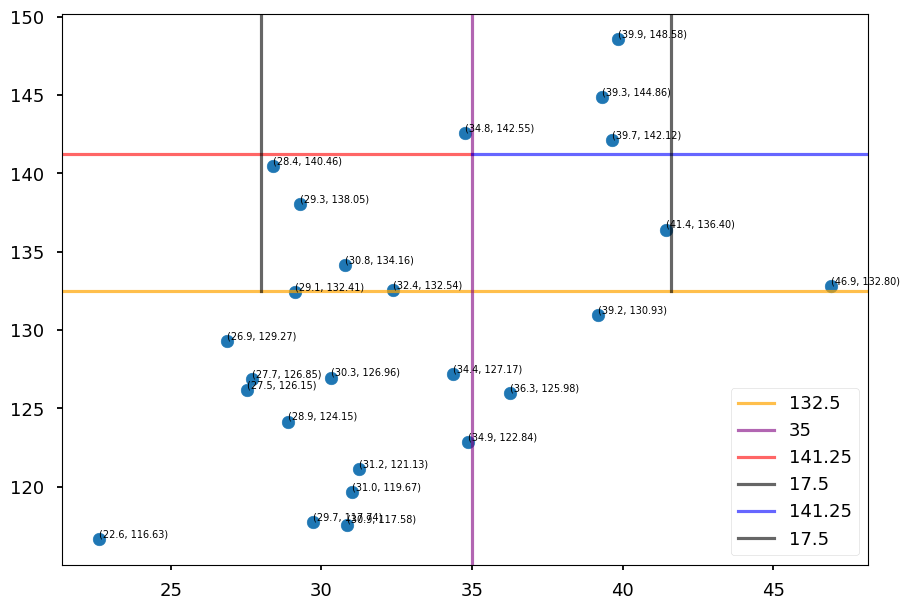

In [99]:
df3 = pl.read_csv(r"d:\Datasets\CampusX\batter.csv").limit(25)

plt.scatter('avg', 'strike_rate', data=df3, label='_nolegend_')  # no legend will be shown for this.
for i in range(25):
    x, y = df3['avg'][i], df3['strike_rate'][i]
    plt.text(x=x, y=y, s=f"({x:.1f}, {y:.2f})", ha='left', va='bottom', wrap=True, fontsize=7)

plt.axhline(y=132.5, color='orange', label=132.5, alpha=0.7) # horizontal line
plt.axvline(x=35,    color='purple', label=35,    alpha=0.6) # vertical   line

# Upper Left
plt.axhline(y=141.25, xmax=0.509, color='red',   label=141.25, alpha=0.6)
plt.axvline(x=28,     ymin=0.496, color='black', label=17.5,   alpha=0.6)
# # Upper Right
plt.axhline(y=141.25, xmin=0.509, color='blue',  label=141.25, alpha=0.6)
plt.axvline(x=41.6,   ymin=0.496, color='black', label=17.5,   alpha=0.6)

plt.legend(loc='lower right')
plt.show()

#                                               subplots using 3 Ways
```js
        The Below Code Block is showing 1 way, the next 2 blocks another ways. But the first way is better for learning in-depth matplotlib since matplotlib offered all their tutorials usingg plt.subplots(). not plt.subplot().
```

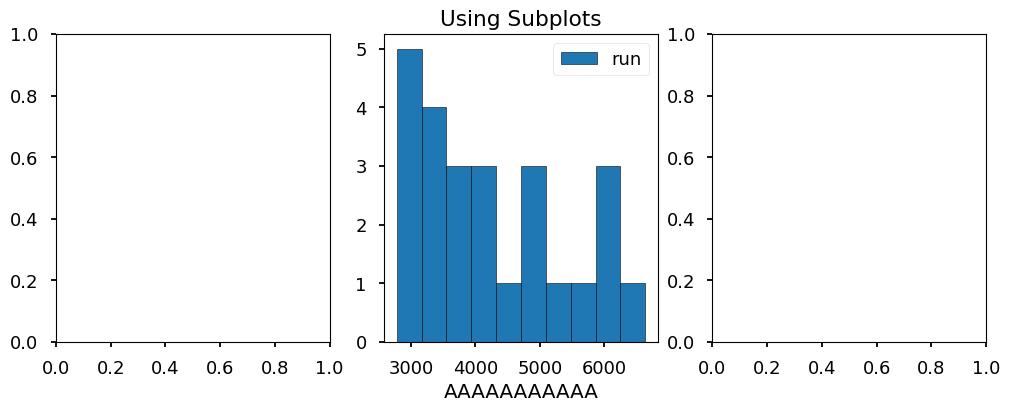

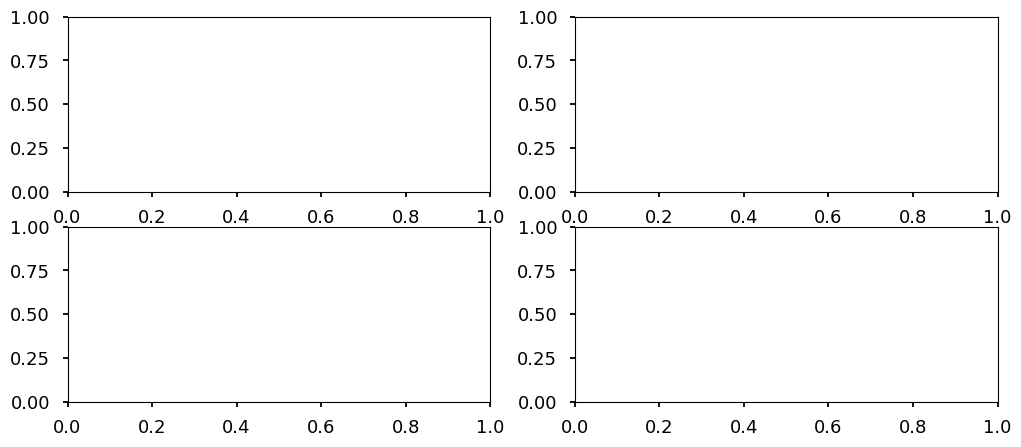

In [ ]:
# print( plt.subplots(nrows=1, ncols=1, figsize=(12, 3)) )
_ = """
        Output :        (<Figure size 1200x300 with 1 Axes>, <Axes: >)

    From the output, we're being returned 'Figure'(The Image) and 'Axes'(X and Y axis. on where we'll draw everything).
        1) So using 'Figure' we can add more subplot, remove subplot, decorate our image with background color, extracting info
           about the Image etc.
        2) Yes we draw on the 'Figure', to be precise on SPECIFIC 'X and Y axis', right? e.g. if we have 4 subplots, then we have
           to say on which subplot(i.e. on which X and Y axis) we want to draw. So using 'Axes' we draw.
"""
# -------------------------------------------------------------------------------------------------------------------------------

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
_ = """
        Output :        (<Figure size 1200x400 with 3 Axes>,
        --------        array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

        So we're getting 1 Figure and 3 Axes.  '3 Axes' are inside a 1D Numpy Array[1st_Axes, 2nd_Axes, 3rd_Axes].
        If we want to draw Histogram on 2nd Axes, we've to say axes[1].hist(..) and then if we want to display it, we've to say
        fig.show() but fig.show() returns error in VScode, in colab fig.show() works. So we'll say here plt.show() E.G. :
"""
df3 = pl.read_csv(r"d:\Datasets\CampusX\batter.csv").limit(25)
axes[1].hist('runs', data=df3, edgecolor='black', label='run')
axes[1].set_title("Using Subplots") # instead of plt.title()
axes[1].set_xlabel("AAAAAAAAAAA") # instead of plt.xlabel()
axes[1].legend()
# -------------------------------------------------------------------------------------------------------------------------------

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 5))
_ = """
        axes :    [[<Axes: > <Axes: >]
        ------     [<Axes: > <Axes: >]]

        We're getting 1 Figure and 4 Axes. '4 Axes' are inside a 2D Numpy Array[[1st_Axes, 2nd_Axes], [3rd_Axes, 4th_Axes]].
        If we want to draw Histogram on 2nd Axes of the 1st Row, we've to say axes[0, 1].hist(..).
"""
# -------------------------------------------------------------------------------------------------------------------------------

_ = """
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

        Output : (<Figure size 1200x300 with 1 Axes>, <Axes: >)

        Now if we want to draw e.g. scatter() on the axes, we've to say :
                axes.scatter()   not   axes[0].scatter()   because  'axes' returns just 1 'axes', not array, means 'Axes' object
                is not subscriptable.
"""
# -------------------------------------------------------------------------------------------------------------------------------

_ = """
        Instead of  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 5))
        We can say  fig, (axes1, axes2, axes3, axes4) = plt.subplots(nrows=2, ncols=2, figsize=(12, 5))

        But still after typing "axes1.", I haven't seen any functions suggestions both here and colab.
"""
plt.show()

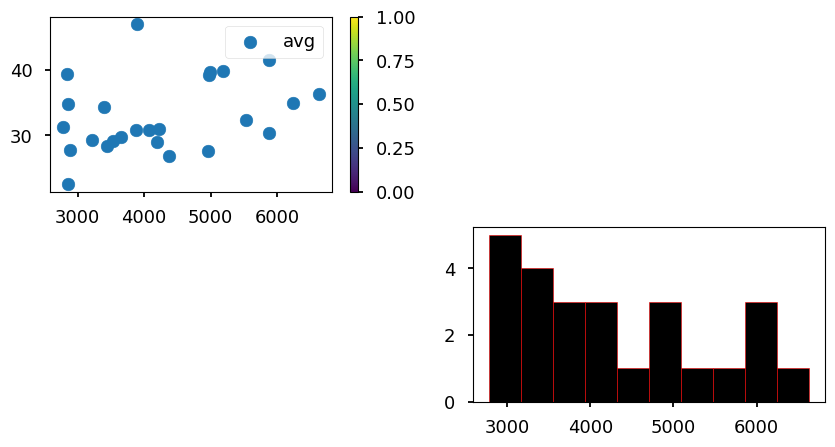

In [53]:
fig = plt.figure(figsize=(10, 5)) # returns "<Figure size 1000x500 with 0 Axes>", not any Image
df3 = pl.read_csv(r"d:\Datasets\CampusX\batter.csv").limit(25)

axes1 = fig.add_subplot(2, 2, 1)
scatter = axes1.scatter('runs', 'avg', data=df3)
fig.colorbar(mappable=scatter, ax=axes1) # why not axes1.colorbar(..)? Look Output and you'll see, OUTSIDE OF THE BOX(Axes)
axes1.legend()                           # the colorbar() is drawn. But legend() is drawn inside the BOX(Axes).

axes2 = fig.add_subplot(2, 2, 4)
axes2.hist('runs', data=df3, color='black', edgecolor='red')

plt.show() # can't write fig.show() since in VScode fig.show() returns error.

explanation = """
    1) Here after typing "axes1." we'll have Functions Suggestions and after typing "axes1.scatter()" we'll be able to see what's
       inside the functions scatter().
    2) BUT in the previous code block after typing "axes[0]." you won't even see any Functions Suggestions and after typing 
       "axes[0].scatter()" you won't be able to see what's the Parameters inside the function 'scatter()'.
   
   So This method more convenient.
"""

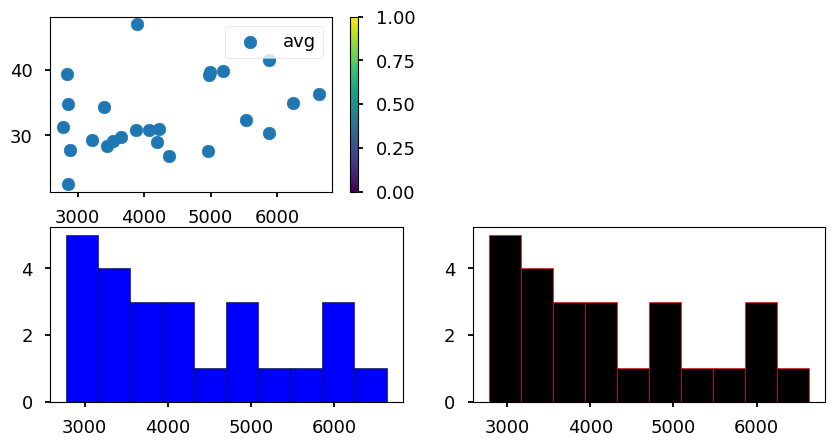

In [ ]:
plt.figure(figsize=(10, 5)) # returns "<Figure size 1000x500 with 0 Axes>", not any Image
df3 = pl.read_csv(r"d:\Datasets\CampusX\batter.csv").limit(25)

plt.subplot(2, 2, 1) # not subplots() because we're adding subplot() one by one like the previous code block, not like axes[0].
plt.scatter('runs', 'avg', data=df3)
plt.colorbar()
plt.legend()

plt.subplot(2, 2, 4)
plt.hist('runs', data=df3, color='black', edgecolor='red')

plt.subplot(2, 2, 3)
plt.hist('runs', data=df3, color='blue', edgecolor='black')

plt.show()

conclusion = """
    plt.subplots() is better because you can customize further more directly on the 'axes' and matplotlib has all tutorials using
    plt.subplots().
"""

#                                       3D Scatter Plot 

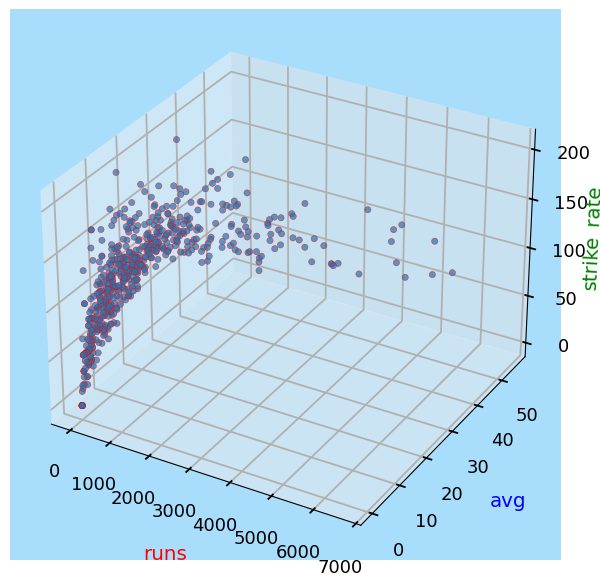

In [ ]:
df4 = pl.read_csv(r"d:\Datasets\CampusX\batter.csv") #   ┆ batter ┆ runs ┆ avg ┆ strike_rate ┆
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection='3d', facecolor='#a9ddfc') # plotting 3d projection only for this 'axes'.

ax.scatter(xs='runs', ys='avg', zs='strike_rate', data=df4, edgecolors='red', alpha=0.7)

ax.set_xlabel("runs", labelpad=20, color='red')
ax.set_ylabel("avg",  labelpad=20, color='blue')
ax.set_zlabel("strike_rate", labelpad=7, color='green')

plt.show()
_ = """
    fig, axes = plt.subplots(nrows=2, ncols=1, projection='3d') doesn't work. Why? Because we are plotting '3d' only for FIRST
    AXES(axes[0]), not for every axes in the subplots. Also only the FIRST AXES will have 3d properties which other axes won't.
"""

#                                               3D Line Plot
```js
        Warning : ax.plot(xs='runs', ys='avg', zs='strike_rate', data=df4) doesnt work. So our only option is :
                  ax.plot(xs=df4['runs'], ys=df4['avg'], zs=df4['strike_rate'])
```

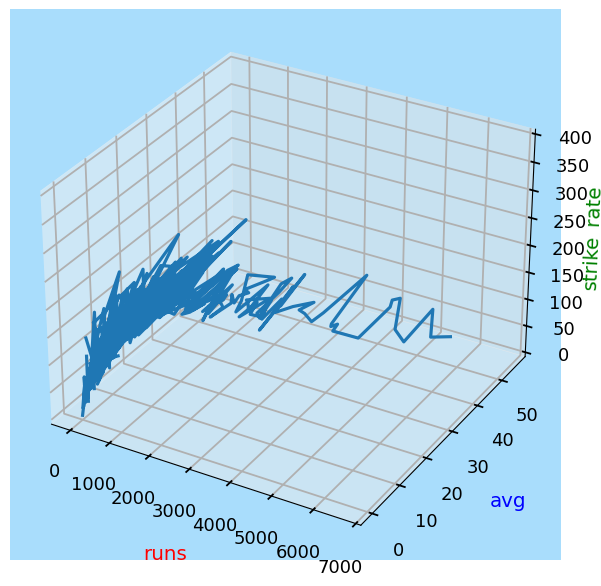

In [13]:
df4 = pl.read_csv(r"d:\Datasets\CampusX\batter.csv") #   ┆ batter ┆ runs ┆ avg ┆ strike_rate ┆
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection='3d', facecolor='#a9ddfc') # plotting 3d projection only for this 'axes'.

ax.plot(xs=df4['runs'], ys=df4['avg'], zs=df4['strike_rate'])

ax.set_xlabel("runs", labelpad=20, color='red')
ax.set_ylabel("avg",  labelpad=20, color='blue')
ax.set_zlabel("strike_rate", labelpad=7, color='green')

plt.show()

# See the 'trigonometry.ipynb' to see more 3D ax.plot() and how 3D Plots are created.

#                                                   Surface Plot
```js
        How we do create Surface Plot?
        ------------------------------
        Take a Paper and create a Box. Now we have a box with nothing inside it. Using that same paper we can create aeroplane, tiny paper boat, jar etc. This is called Surface Plot.
        
        So to create a surface plot, at first we need 'A 2D Paper(meshgrid)'. And then give each (x, y) point of that paper(meshgrid) a HEIGHT(z axis). How will we know what should we put to 'z'? See the next 2nd Code Block. But start from the next block.
```

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]  --> x1, y1
------------------------------------------------------------------------------------------------------------------------

[[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]] --> xx
------------------------------------------------------------------------------------------------------------------------

[[-5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.]
 [-4. -4. -4. -4. -4. -4. -4. -4. -4. -4. -4.]
 [-3. -3. -3. -3. -3. -3. -3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2. -2. -2. -2

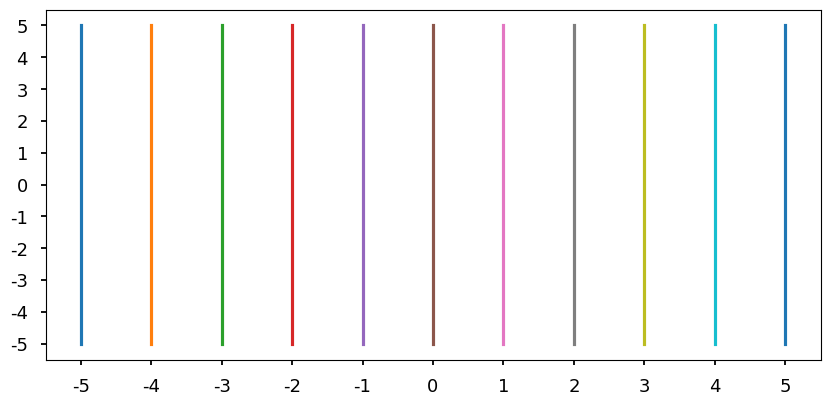

In [21]:
#                                                   1) Meshgrid

x = y = np.linspace(-5, 5, 11)  # x1, y1 are not pointing to the same Array.
print(x, extra_info("x1, y1"))

xx, yy = np.meshgrid(x, y)
print(f"{xx}{extra_info("xx")}\n{yy}{extra_info("yy")}")

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(xx, yy)
ax1.set_xticks(x.astype('int8'), x.astype('int8'))
ax1.set_yticks(x.astype('int8'), x.astype('int8'))

plt.show()

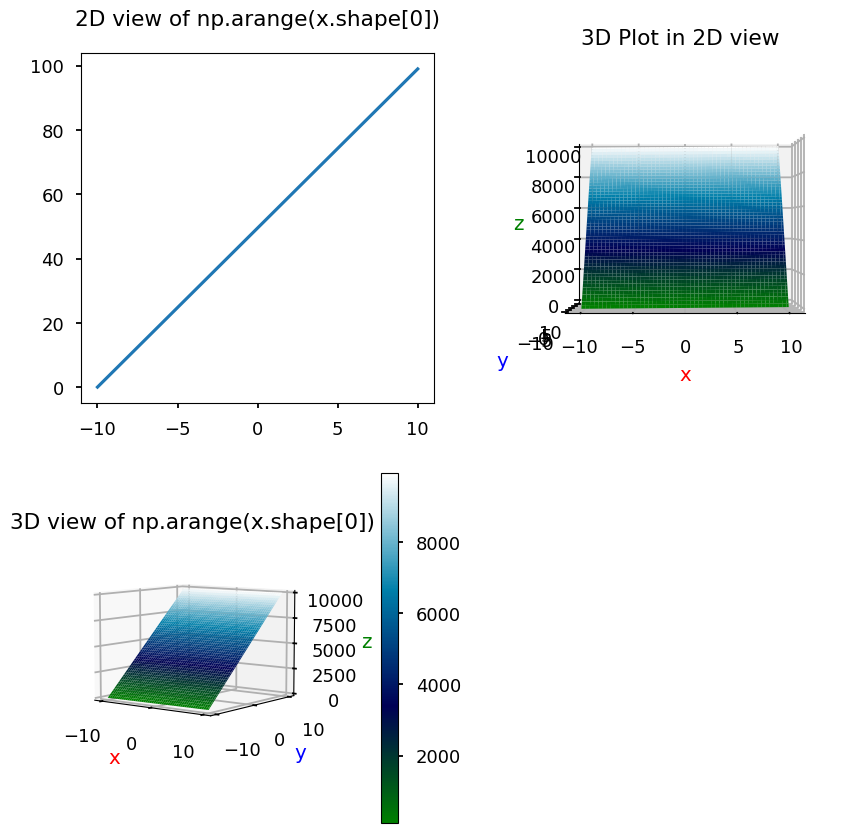

In [3]:
x = y = np.linspace(-10, 10, 100)  # x1, y1 are not pointing to the same Array.
xx, yy = np.meshgrid(x, y)
zz = np.arange(x.shape[0]**2).reshape((100, 100)) # Bottom-Left Corner (-10, -10) => 100 + 100 = 200(the highest point of Z axis)

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(x, np.arange(x.shape[0]))   # By this we can know how our 3D plot looks in 2D plot. ALWAYS CREATE THE 2D PLOT OF 'zz' first.
ax1.set_title("2D view of np.arange(x.shape[0])", pad=20)

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.plot_surface(xx, yy, zz, cmap='ocean')
ax2.set_title("3D Plot in 2D view")
ax2.set_xlabel("x", labelpad=20, c='red')
ax2.set_ylabel("y", labelpad=20, c='blue')
ax2.set_zlabel("z", labelpad=20, c='green')
ax2.view_init(0, -90)

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
p = ax3.plot_surface(xx, yy, zz, cmap='ocean')
fig.colorbar(mappable=p, ax=ax3, pad=0.22)
ax3.set_title("3D view of np.arange(x.shape[0])")
ax3.set_xlabel("x", labelpad=10, c='red')
ax3.set_ylabel("y", labelpad=10, c='blue')
ax3.set_zlabel("z", labelpad=10, c='green')
ax3.view_init(7, -53)
plt.show()

explanation = """
See "n.png" in the same Matplotlib Folder. As you can see, we always need to draw the 2D Graph FIRST. Then we can almost assume
how the Surface Plot will look like.

Its really better to plot the same thing in a .py file because there you can even rotate the Surface Plot holding the left
button of the mouse.
"""

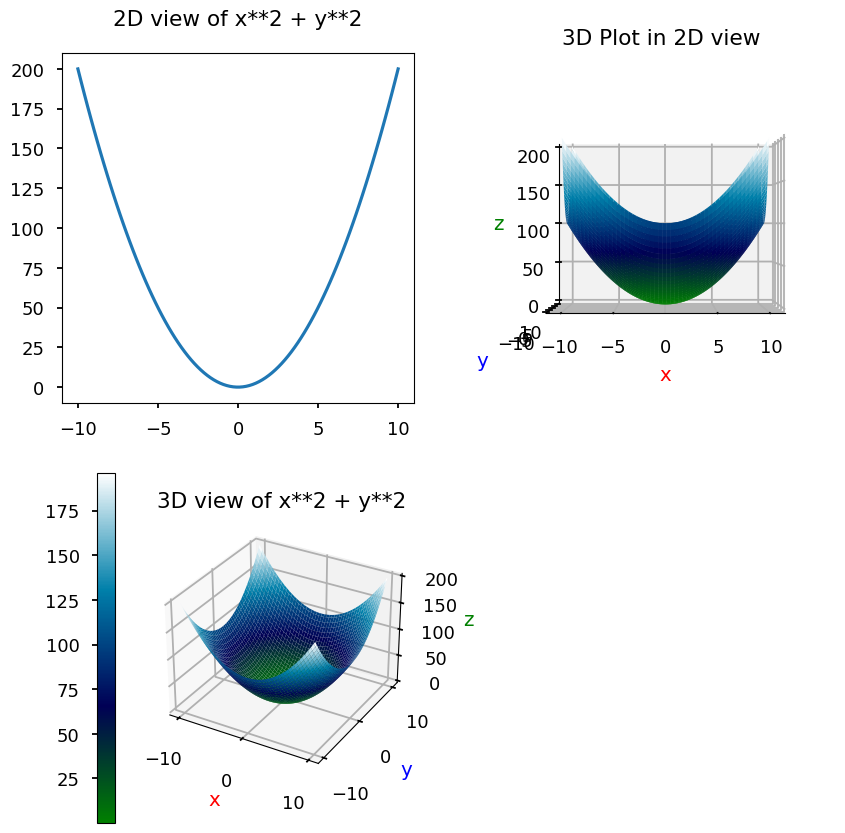

In [31]:
x = y = np.linspace(-10, 10, 100)  # x1, y1 are not pointing to the same Array.
xx, yy = np.meshgrid(x, y)
zz = xx**2 + yy**2 # Bottom-Left Corner (-10, -10) => 100 + 100 = 200(the highest point of Z axis)

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(x, x**2 + y**2)   # By this we can know how our 3D plot looks in 2D plot. ALWAYS CREATE THE 2D PLOT OF 'zz' first.
ax1.set_title("2D view of x**2 + y**2", pad=20)

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.plot_surface(xx, yy, zz, cmap='ocean')
ax2.set_title("3D Plot in 2D view")
ax2.set_xlabel("x", labelpad=20, c='red')
ax2.set_ylabel("y", labelpad=20, c='blue')
ax2.set_zlabel("z", labelpad=20, c='green')
ax2.view_init(0, -90)

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
p = ax3.plot_surface(xx, yy, zz, cmap='ocean')
fig.colorbar(mappable=p, ax=ax3, location='left')
ax3.set_title("3D view of x**2 + y**2")
ax3.set_xlabel("x", labelpad=10, c='red')
ax3.set_ylabel("y", labelpad=10, c='blue')
ax3.set_zlabel("z", labelpad=10, c='green')

plt.show()

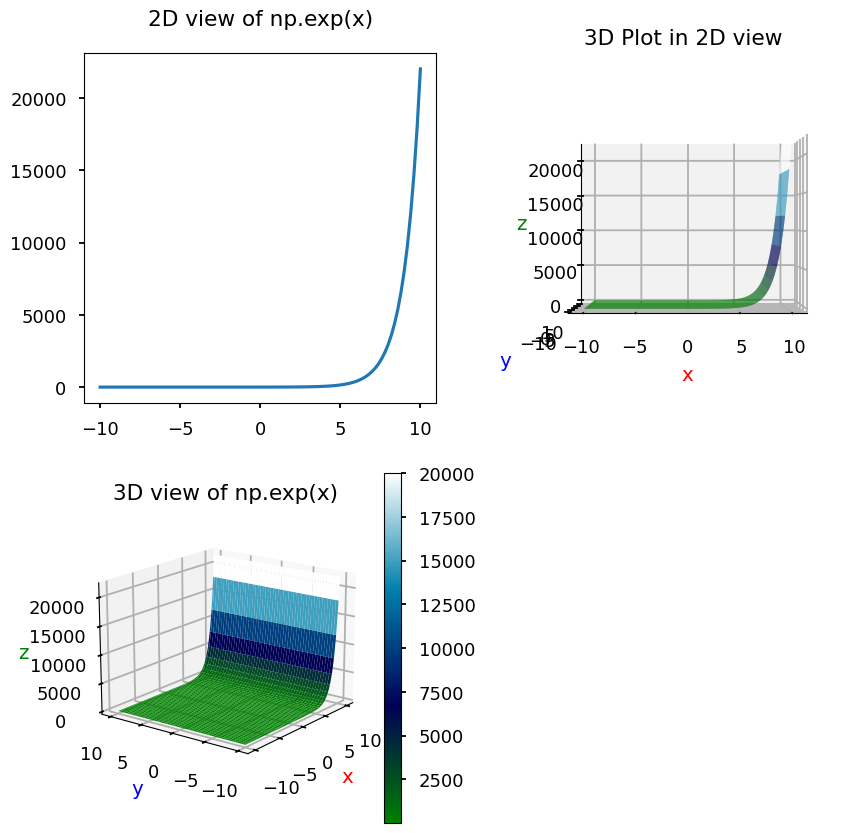

In [18]:
x = y = np.linspace(-10, 10, 100)  # x1, y1 are not pointing to the same Array.
xx, yy = np.meshgrid(x, y)
zz = np.exp(xx) # Bottom-Left Corner (-10, -10) => 100 + 100 = 200(the highest point of Z axis)

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(x, np.exp(x))   # By this we can know how our 3D plot looks in 2D plot. ALWAYS CREATE THE 2D PLOT OF 'zz' first.
ax1.set_title("2D view of np.exp(x)", pad=20)

ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.plot_surface(xx, yy, zz, cmap='ocean')
ax2.set_title("3D Plot in 2D view")
ax2.set_xlabel("x", labelpad=20, c='red')
ax2.set_ylabel("y", labelpad=20, c='blue')
ax2.set_zlabel("z", labelpad=20, c='green')
ax2.view_init(0, -90)

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
p = ax3.plot_surface(xx, yy, zz, cmap='ocean')
fig.colorbar(mappable=p, ax=ax3)
ax3.set_title("3D view of np.exp(x)")
ax3.set_xlabel("x", labelpad=10, c='red')
ax3.set_ylabel("y", labelpad=10, c='blue')
ax3.set_zlabel("z", labelpad=10, c='green')
ax3.view_init(17, -143)
plt.show()

#                                                       contourf
```js
        contour(x, y, z) converts the 3D Graph to 2D Graph. How? 'View from to top(90 degree)'.
```

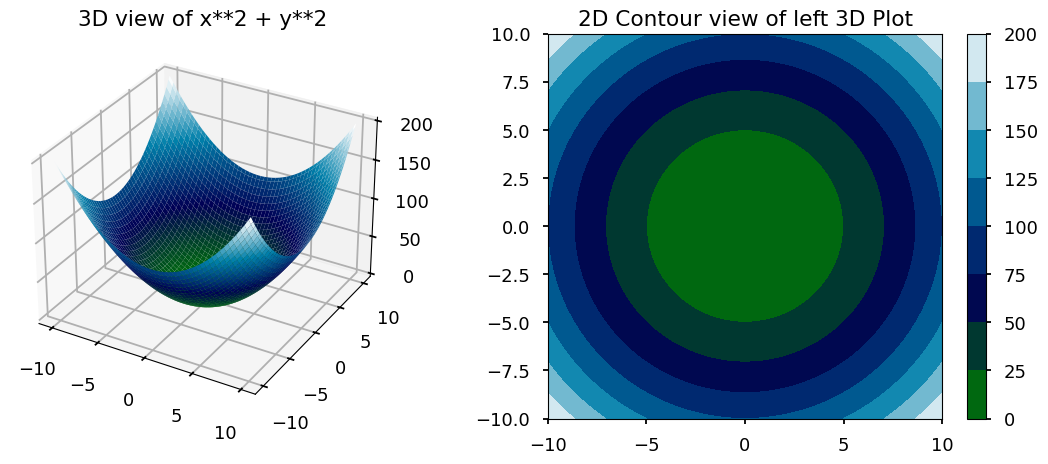

In [25]:
x = y = np.linspace(-10, 10, 100)  # x1, y1 are not pointing to the same Array.
xx, yy = np.meshgrid(x, y)
zz = xx**2 + yy**2 # Bottom-Left Corner (-10, -10) => 100 + 100 = 200(the highest point of Z axis)

fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(xx, yy, zz, cmap='ocean')
ax1.set_title("3D view of x**2 + y**2")

ax2 = fig.add_subplot(1, 2, 2)
p = ax2.contourf(xx, yy, zz, cmap='ocean') # takes (x, y, z) but returns (x, y)
fig.colorbar(mappable=p, ax=ax2)
ax2.set_title("2D Contour view of left 3D Plot")

plt.show()
explanation = """
    Right Image : As you can see, the Center color(Green) is actually the deepest color of the Left 3D Image.
    The colorbar of the Right Image : The top the color, the low the depth e.g. Green in the lowest(0-25), means Green is the
                                      maximum depth.
    
    Summary : At right, we draw circles and colored them. So we have (x, y, color). Since the Color is representing DEPTH,
              color is working as Z axis here but since the Contour is 2D Graph, we don't have Z axis directly.
"""

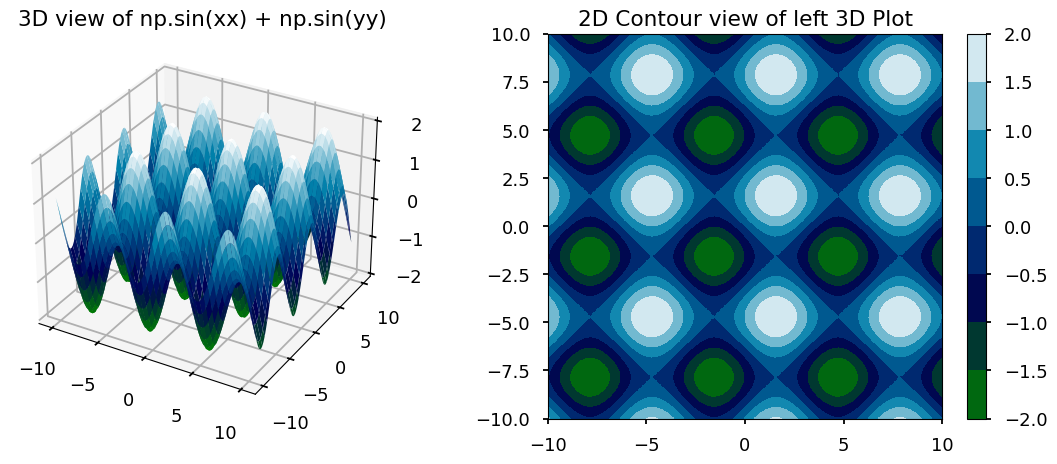

In [27]:
x = y = np.linspace(-10, 10, 100)  # x1, y1 are not pointing to the same Array.
xx, yy = np.meshgrid(x, y)
zz = np.sin(xx) + np.sin(yy) # Bottom-Left Corner (-10, -10) => 100 + 100 = 200(the highest point of Z axis)

fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(xx, yy, zz, cmap='ocean')
ax1.set_title("3D view of np.sin(xx) + np.sin(yy)")

ax2 = fig.add_subplot(1, 2, 2)
p = ax2.contourf(xx, yy, zz, cmap='ocean') # takes (x, y, z) but returns (x, y)
fig.colorbar(mappable=p, ax=ax2)
ax2.set_title("2D Contour view of left 3D Plot")

plt.show()

#                                                   Heatmap

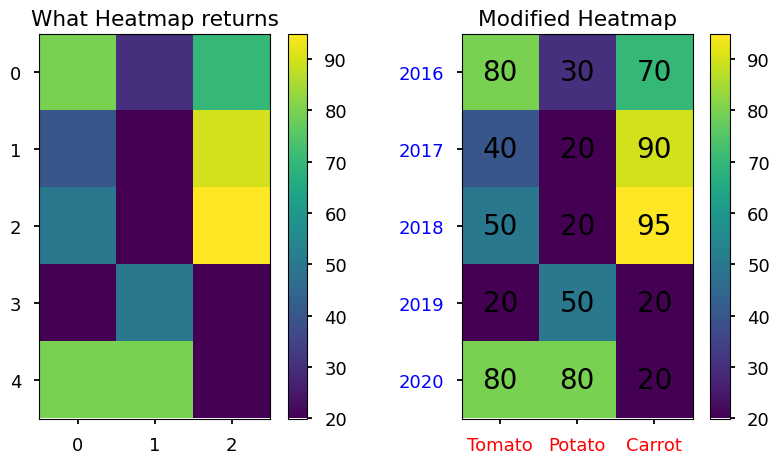

In [120]:
veggies = pd.DataFrame(data={'Year'   : [2016, 2017, 2018, 2019, 2020],
                             'Tomato' : [ 80 ,  40 ,  50 ,  20 ,  80 ],  # Sales Growth
                             'Potato' : [ 30 ,  20 ,  20 ,  50 ,  80 ],  #     ||
                             'Carrot' : [ 70 ,  90 ,  95 ,  20 ,  20 ]}) #     ||
grid = veggies.iloc[:, 1:]
"""
shape: (5, 3)   --> Grid 
┌────────┬────────┬────────┐
│ Tomato ┆ Potato ┆ Carrot │
│ ---    ┆ ---    ┆ ---    │
│ i64    ┆ i64    ┆ i64    │
╞════════╪════════╪════════╡
│ 80     ┆ 30     ┆ 70     │
│ 40     ┆ 20     ┆ 90     │
│ 50     ┆ 20     ┆ 95     │
│ 20     ┆ 50     ┆ 20     │
│ 80     ┆ 80     ┆ 20     │
└────────┴────────┴────────┘
"""

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
heatmap = ax1.imshow(grid)

ax1.set_title("What Heatmap returns")
fig.colorbar(mappable=heatmap, ax=ax1)

# ---------------------------------------------------------------------------------------------------------------------

ax2 = fig.add_subplot(1, 2, 2)
heatmap = ax2.imshow(grid)
fig.colorbar(mappable=heatmap, ax=ax2)
ax2.set_title("Modified Heatmap")
ax2.set_xticks(ticks=range(0, grid.shape[1]),    labels=grid.columns,       c='red')
ax2.set_yticks(ticks=range(0, veggies.shape[0]), labels=veggies.iloc[:, 0], c='blue')

for r in range(grid.shape[0]):
    for c in range(grid.shape[1]):
        ax2.text(x=c, y=r, s=grid.iloc[r, c], fontsize=20, ha='center', va='center') # BE CAREFUL when putting x=c, y=r

plt.show()
explanation = """
    Right Heatmap : The colorbar telling us that [lime, green, yellow] colors are >= 80% Sales Growth.
                    So anywhere on the heatmap we see any of these 3 colors, means for that corresponding year, that Veggy
                    has a really good sale. We didn't even need to search values 80-100 on the heatmap manually, the colorbar
                    told us that.

                    If we want to see the TOP SALES GROWTH, we just have to search for the color YELLOW or around YELLOW on
                    the heatmap. The values on the heatmap are presented to see the actual value.
"""

#                                                       Colorbar
```js
        Syntax : colorbar(mappable, 'boundaries', 'ticks', cax, ax, **kwargs)

        We worked with default colorbar() already. Now see the below Right Colorbar. Cool, right? To create it see 'k.png' -> 'l.png' -> 'm.png' in this same matplotlib folder.

        When creating such colorbar where there is more than 1 color, we need to know FIRST which values cause these colors?
        In scatter() plot we see different colors when we set 'c' parameter. In heatmap, the 'grid' itself is the reason for different colors. So our FIRST job is to extract those values in 'Unique and Sorted order' and assign them to a variable 'bounds'.
            Now using 'bounds' + [1 extra boundary], we set the 'boundaries' parameter inside colorbar(). If you don''t set the 'ticks' parameter, then 'ticks' will be 'boundaries'. 
            Then determine where you want the 'ticks' to be : Center / Lower / Upper. According to your choice, calculate the 'ticks' values and pass it to 'ticks' parameter.
            Finally if you want to update your tickvalues/ticklabels, use set_ticklabels(new_ticklabels).
        
        Warning : When creating such colorbar, the colors inside colorbar may look like LIGHTER than the original color.
```

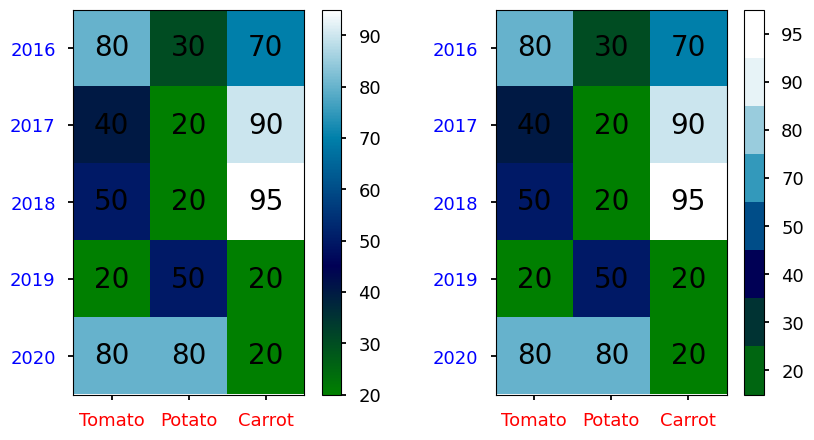

In [12]:
veggies = pd.DataFrame(data={'Year'   : [2016, 2017, 2018, 2019, 2020],
                             'Tomato' : [ 80 ,  40 ,  50 ,  20 ,  80 ],  # Sales Growth
                             'Potato' : [ 30 ,  20 ,  20 ,  50 ,  80 ],  #     ||
                             'Carrot' : [ 70 ,  90 ,  95 ,  20 ,  20 ]}) #     ||
grid = veggies.iloc[:, 1:]
fig = plt.figure(figsize=(10, 5))
cmap = plt.get_cmap(name='ocean')             # cmap

ax = fig.add_subplot(1, 2, 1)
heatmap = ax.imshow(grid, cmap=cmap)
ax.set_xticks(ticks=range(0, grid.shape[1]),    labels=grid.columns,       c='red')
ax.set_yticks(ticks=range(0, veggies.shape[0]), labels=veggies.iloc[:, 0], c='blue')

for r in range(grid.shape[0]):
    for c in range(grid.shape[1]):
        ax.text(x=c, y=r, s=grid.iloc[r, c], fontsize=20, ha='center', va='center')

fig.colorbar(mappable= heatmap, ax=ax)

#----------------------------------------- Below The Custom Colorbar ---------------------------------------

ax1 = fig.add_subplot(1, 2, 2)
heatmap1 = ax1.imshow(grid, cmap=cmap)
ax1.set_xticks(ticks=range(0, grid.shape[1]),    labels=grid.columns,       c='red')
ax1.set_yticks(ticks=range(0, veggies.shape[0]), labels=veggies.iloc[:, 0], c='blue')

for r in range(grid.shape[0]):
    for c in range(grid.shape[1]):
        ax1.text(x=c, y=r, s=grid.iloc[r, c], fontsize=20, ha='center', va='center')

bounds = np.unique(grid.to_numpy().flatten()) # [20, 30, 40, 50, 70, 80, 90, 95]
boundary = np.append(bounds, bounds[-1] + 5)  # [20, 30, 40, 50, 70, 80, 90, 95, 100]

cbr = fig.colorbar(mappable= heatmap,
                   boundaries= boundary,
                   ticks= bounds + [(boundary[i+1] - boundary[i]) / 2 for i in range(bounds.shape[0])],
                   ax= ax1)      # ----------------- [5, 5, 5, 10, 5, 5, 2.5, 2.5] -------------------

cbr.set_ticklabels(bounds) # Overridden 'ticks'.

plt.show()
explanation = """
Right Colorbar : Each color comparatively denser than the actual color presented in the Heatmap.
"""

#                                                          Pandas plot
```js
        Dataframe/Series.plot(kind     = ['line', 'bar', 'barh', 'hist', 'box', 'kde', 'density', 'area', 'pie', 'scatter', 'hexbin'],
                              x         = column name to use on 'x' axis,
                              y         = column name to use on 'y' axis, (x, y are applicable for Dataframe, not Series)
                              subplots  = bool,
                              figsize   = tuple[float, float] inch,
                              title     = str,
                              legend    = bool | Literal['reverse'],
                              xticks    = Sequence[float],
                              yticks    = Sequence[float],
                              fontsize  = float,
                              colorbar  = bool,
                              cmap      = str,
                              rot       = rotation (same as matplotlib rotation)
                              sharex    = bool,
                              sharey    = bool,
                              ax        = Axes | None,
                              edgecolor = str,
                              stacked   = bool, default False in line and bar plots, and True in area plot.
                                         If True, create stacked plot,
                              **kwargs
                              )
        
        [See More](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) and especially at the Left Menu for all Pandas Plot because I will not code for every plot, only the common ones.
        
        Note : df.plot(kind='scatter')   or   df.plot.scatter()    -> The Second Approach is better. 
```

#                                               Pandas plot.scatter()
```js
        Its same as plt.scatter() with additional parameter like, figsize, legend etc. See [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html].
                                        
        **kwargs = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
```

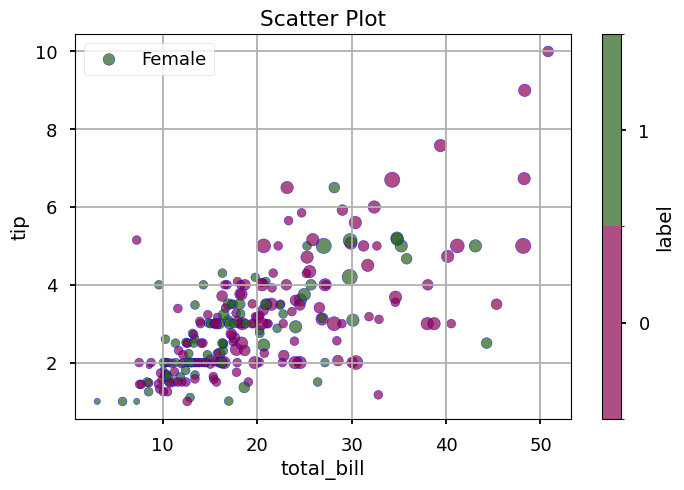

In [4]:
tips = sns.load_dataset('tips').assign(size=lambda df: df['size'] * 20,
                                       label=lambda df: df['sex'].cat.rename_categories({'Male' : 0, 'Female' : 1}))
"""
tips :
┌────────────┬──────┬────────┬────────┬─────┬────────┬──────┬─────────┬───────┐
│ total_bill ┆ tip  ┆ sex    ┆ smoker ┆ day ┆ time   ┆ size ┆ minutes ┆ label │
╞════════════╪══════╪════════╪════════╪═════╪════════╪══════╪═════════╪═══════╡
│ 16.99      ┆ 1.01 ┆ Female ┆ No     ┆ Sun ┆ Dinner ┆ 2    ┆ 40      ┆ 1     │
│ 10.34      ┆ 1.66 ┆ Male   ┆ No     ┆ Sun ┆ Dinner ┆ 3    ┆ 60      ┆ 0     │
│ 21.01      ┆ 3.5  ┆ Male   ┆ No     ┆ Sat ┆ Dinner ┆ 3    ┆ 60      ┆ 0     │
│ 23.68      ┆ 3.31 ┆ Male   ┆ No     ┆ Sun ┆ Dinner ┆ 2    ┆ 40      ┆ 0     │
│ 24.59      ┆ 3.61 ┆ Female ┆ No     ┆ Mon ┆ Dinner ┆ 4    ┆ 80      ┆ 1     │
└────────────┴──────┴────────┴────────┴─────┴────────┴──────┴─────────┴───────┘
"""

tips.plot.scatter(figsize=(8, 5), x='total_bill', y='tip', s='size', c='label', cmap='PiYG', edgecolor='blue', alpha=0.7,
                  label = 'Female', legend=True, grid=True, title='Scatter Plot')
plt.show() # Otherwise the above line returns "Axes ..."

#                                                   Pandas plot.line()
```js
            Its same as plt.plot() for plotting 2D Line with additional parameter like, figsize, legend etc. See [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html]

            **kwargs = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
```

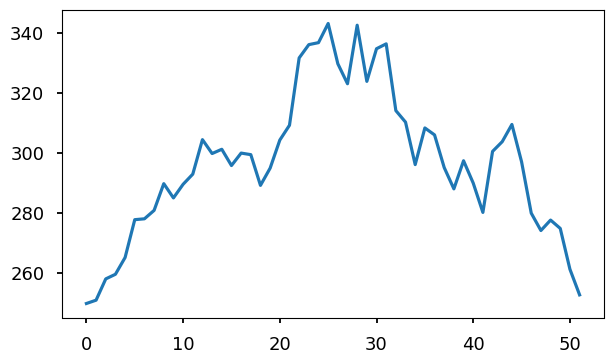

In [36]:
stocks = pd.read_csv(r'd:\Datasets\CampusX\stocks')
""" Shape : (52, 4)
┌────────────┬────────────┬────────────┬────────────┐
│ Date       ┆ MSFT       ┆ FB         ┆ AAPL       │
╞════════════╪════════════╪════════════╪════════════╡
│ 2021-05-24 ┆ 249.679993 ┆ 328.730011 ┆ 124.610001 │
│ 2021-05-31 ┆ 250.789993 ┆ 330.350006 ┆ 125.889999 │
│ 2021-06-07 ┆ 257.890015 ┆ 331.26001  ┆ 127.349998 │
└────────────┴────────────┴────────────┴────────────┘
"""
stocks['MSFT'].plot.line(figsize=(7, 4)) # By default X Axis = Index of stocks['MSFT'] Series and Y Axis = 'MSFT' Column.
plt.show()

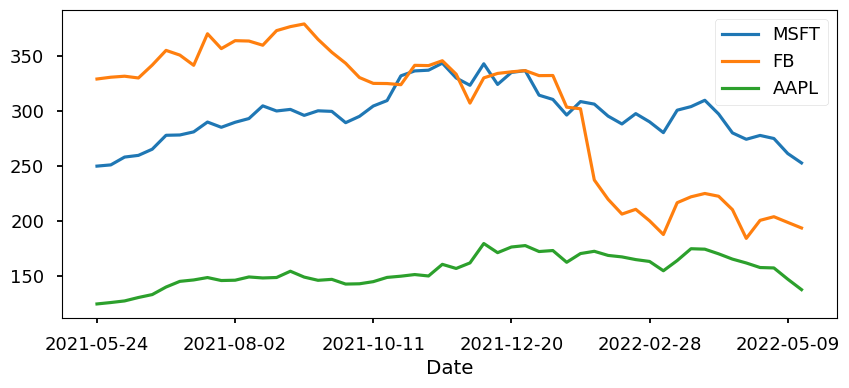

In [ ]:
stocks = pd.read_csv(r'd:\Datasets\CampusX\stocks').drop(columns=['Unnamed: 0'])
""" Shape : (52, 4)
┌────────────┬────────────┬────────────┬────────────┐
│ Date       ┆ MSFT       ┆ FB         ┆ AAPL       │
╞════════════╪════════════╪════════════╪════════════╡
│ 2021-05-24 ┆ 249.679993 ┆ 328.730011 ┆ 124.610001 │
│ 2021-05-31 ┆ 250.789993 ┆ 330.350006 ┆ 125.889999 │
│ 2021-06-07 ┆ 257.890015 ┆ 331.26001  ┆ 127.349998 │
└────────────┴────────────┴────────────┴────────────┘
"""
stocks.plot.line(x='Date', figsize=(10, 4))

explanation = """
x='Date' => So on X Axis the 'Date' column will be placed and since 'y' value hasn't given, all the Numerical Column will be
            plotted on each other i.e. by default stacked=True here.
"""

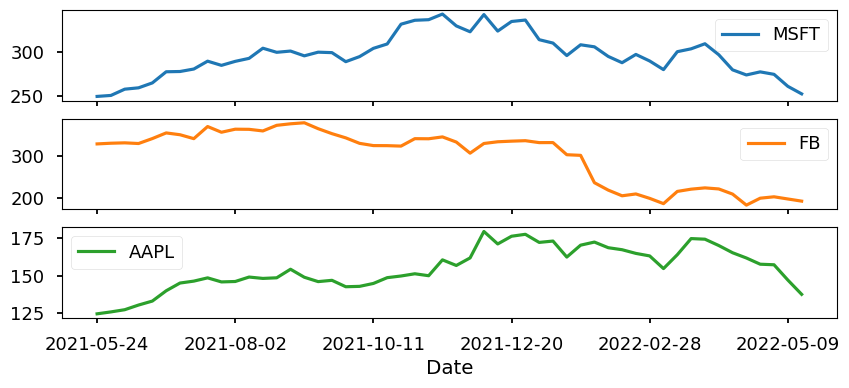

In [58]:
stocks = pd.read_csv(r'd:\Datasets\CampusX\stocks').drop(columns=['Unnamed: 0'])
""" Shape : (52, 4)
┌────────────┬────────────┬────────────┬────────────┐
│ Date       ┆ MSFT       ┆ FB         ┆ AAPL       │
╞════════════╪════════════╪════════════╪════════════╡
│ 2021-05-24 ┆ 249.679993 ┆ 328.730011 ┆ 124.610001 │
│ 2021-05-31 ┆ 250.789993 ┆ 330.350006 ┆ 125.889999 │
│ 2021-06-07 ┆ 257.890015 ┆ 331.26001  ┆ 127.349998 │
└────────────┴────────────┴────────────┴────────────┘
"""
stocks.plot.line(x='Date', subplots=True, figsize=(10, 4))

explanation = """
subplots=True : From the output as you can see on the X axis its 'Date' column. Its not like every subplot will have
                different X axis values, NOPE! Since its Pandas plot, by default on the X Axis, it will be Index of each row
                unless specific column is set.
"""

#                                                   Pandas plot.bar()
```js
            Its same as plt.bar() for plotting 2D Bar with additional parameter like, figsize, legend etc. See [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html]

            The First Parameter inside df.plot.bar is 'by' :
                Its the 'Group By'. You can see it with an example in the above link.

            **kwargs = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
```

<Axes: xlabel='batsman'>

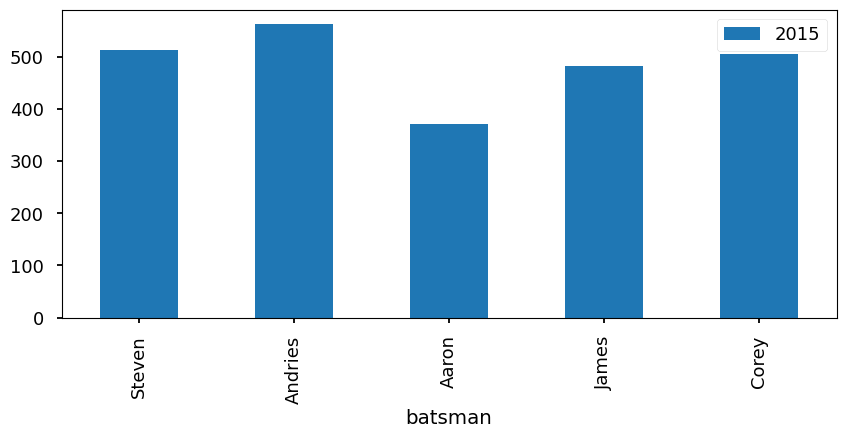

In [11]:
batsman = pd.read_csv(r"d:\Datasets\CampusX\batsman_season_record.csv")
"""
shape: (5, 4)
┌─────────┬──────┬──────┬──────┐
│ batsman ┆ 2015 ┆ 2016 ┆ 2017 │
│ ---     ┆ ---  ┆ ---  ┆ ---  │
│ str     ┆ i64  ┆ i64  ┆ i64  │
╞═════════╪══════╪══════╪══════╡
│ Steven  ┆ 513  ┆ 687  ┆ 216  │
│ Andries ┆ 562  ┆ 848  ┆ 641  │
│ Aaron   ┆ 372  ┆ 284  ┆ 290  │
│ James   ┆ 482  ┆ 489  ┆ 333  │
│ Corey   ┆ 505  ┆ 973  ┆ 308  │
└─────────┴──────┴──────┴──────┘
"""

batsman.plot.bar(x='batsman', y='2015', figsize=(10, 4))

<Axes: xlabel='batsman'>

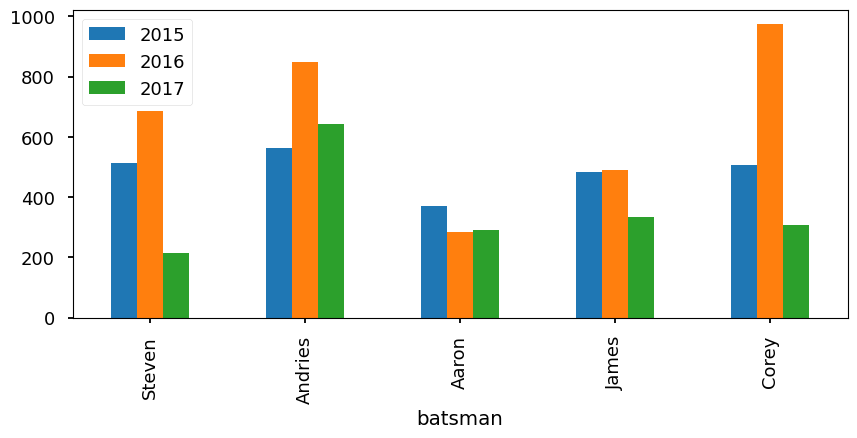

In [12]:
batsman = pd.read_csv(r"d:\Datasets\CampusX\batsman_season_record.csv")
"""
shape: (5, 4)
┌─────────┬──────┬──────┬──────┐
│ batsman ┆ 2015 ┆ 2016 ┆ 2017 │
│ ---     ┆ ---  ┆ ---  ┆ ---  │
│ str     ┆ i64  ┆ i64  ┆ i64  │
╞═════════╪══════╪══════╪══════╡
│ Steven  ┆ 513  ┆ 687  ┆ 216  │
│ Andries ┆ 562  ┆ 848  ┆ 641  │
│ Aaron   ┆ 372  ┆ 284  ┆ 290  │
│ James   ┆ 482  ┆ 489  ┆ 333  │
│ Corey   ┆ 505  ┆ 973  ┆ 308  │
└─────────┴──────┴──────┴──────┘
"""

batsman.plot.bar(x='batsman', figsize=(10, 4))

explanation = """
        Since 'y' is not given, all the Numerical Columns will be bar_plotted on Y Axis next to each other.
"""

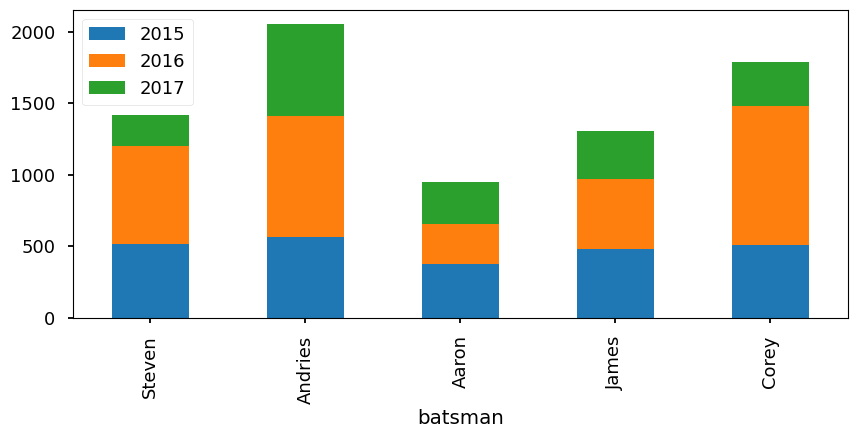

In [14]:
batsman = pd.read_csv(r"d:\Datasets\CampusX\batsman_season_record.csv")
"""
shape: (5, 4)
┌─────────┬──────┬──────┬──────┐
│ batsman ┆ 2015 ┆ 2016 ┆ 2017 │
│ ---     ┆ ---  ┆ ---  ┆ ---  │
│ str     ┆ i64  ┆ i64  ┆ i64  │
╞═════════╪══════╪══════╪══════╡
│ Steven  ┆ 513  ┆ 687  ┆ 216  │
│ Andries ┆ 562  ┆ 848  ┆ 641  │
│ Aaron   ┆ 372  ┆ 284  ┆ 290  │
│ James   ┆ 482  ┆ 489  ┆ 333  │
│ Corey   ┆ 505  ┆ 973  ┆ 308  │
└─────────┴──────┴──────┴──────┘
"""

batsman.plot.bar(x='batsman', stacked=True, figsize=(10, 4))

explanation = """
        'y' is not given and "stacked = True", all the Numerical Columns will be bar_plotted on Y Axis ON TOP OF EACH BAR.
        e.g. For 'Steven' : Blue Bar is 513.
                            On TOP of Blue, Orange Bar is 513 + 687 = 1200 (From 513 to 1200, distance = 687).
                            On TOP of Orange, Green Bar is 1200 + 216 = 1416 (From 1200 to 1416, distance = 216).
"""

#                                                   Pandas plot.barh()
```js
            Its same as plt.h() for plotting 2D Bar HORIZONTALLY with additional parameters like, figsize, legend etc. See [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html]

            Its exactly the same as Pandas plot.bar(), you don't have to worry anything at all. Just instead of 'bar', write 'barh'.

            **kwargs = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
```

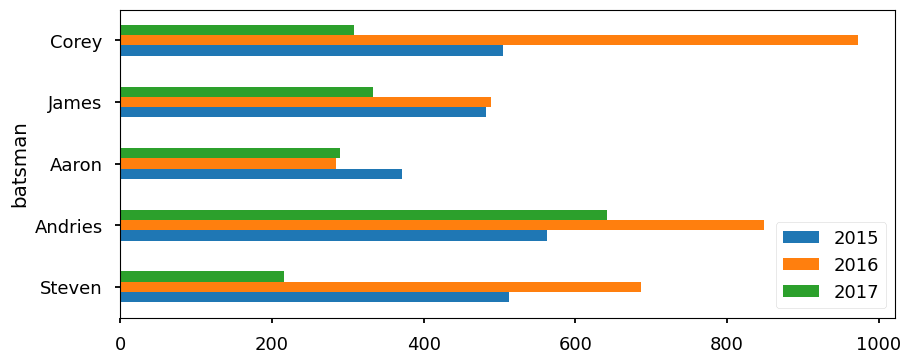

In [68]:
batsman = pd.read_csv(r"d:\Datasets\CampusX\batsman_season_record.csv")
"""
shape: (5, 4)
┌─────────┬──────┬──────┬──────┐
│ batsman ┆ 2015 ┆ 2016 ┆ 2017 │
│ ---     ┆ ---  ┆ ---  ┆ ---  │
│ str     ┆ i64  ┆ i64  ┆ i64  │
╞═════════╪══════╪══════╪══════╡
│ Steven  ┆ 513  ┆ 687  ┆ 216  │
│ Andries ┆ 562  ┆ 848  ┆ 641  │
│ Aaron   ┆ 372  ┆ 284  ┆ 290  │
│ James   ┆ 482  ┆ 489  ┆ 333  │
│ Corey   ┆ 505  ┆ 973  ┆ 308  │
└─────────┴──────┴──────┴──────┘
"""

batsman.plot.barh(x='batsman', figsize=(10, 4))

explanation = """
        Since 'y' is not given, all the Numerical Columns will be bar_plotted on Y Axis next to each other.
"""

#                                                   Pandas plot.hist()
```js
            Its same as plt.hist() for plotting 2D Bar with additional parameter like, figsize, legend etc BUT HERE 'bins' must be int, not List-like. See [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html]

            **kwargs = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
```

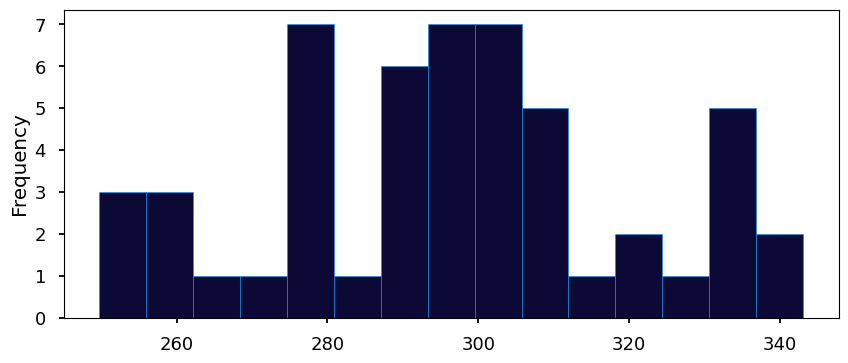

In [57]:
stocks = pd.read_csv(r'd:\Datasets\CampusX\stocks').drop(columns=['Unnamed: 0'])
""" Shape : (52, 4)
┌────────────┬────────────┬────────────┬────────────┐
│ Date       ┆ MSFT       ┆ FB         ┆ AAPL       │
╞════════════╪════════════╪════════════╪════════════╡
│ 2021-05-24 ┆ 249.679993 ┆ 328.730011 ┆ 124.610001 │
│ 2021-05-31 ┆ 250.789993 ┆ 330.350006 ┆ 125.889999 │
│ 2021-06-07 ┆ 257.890015 ┆ 331.26001  ┆ 127.349998 │
└────────────┴────────────┴────────────┴────────────┘
"""
stocks['MSFT'].plot.hist(bins=15, figsize=(10, 4), color='#0d0936', edgecolor='#0795fa') # bins = Number of Bars

explanation = """
bins = 15, row numbers = 52. That doesn't mean each bar will have 52 // 15 = 3 numbers.
So its not like The first bar will have the first 3 Sorted Numbers, second bar the next 3 Sorted Numbers and so on. NOPE!
Tried that and failed to have the desired result :

MSFT, n =  sorted(stocks['MSFT'].to_list()), stocks.shape[0] // 15 # bins = 15 at below
xticks = ([MSFT[0]] + MSFT)[:-1:n] + [MSFT[-1]] # [First Value] + [Every nth value except the last one] + [Last Value]
stocks['MSFT'].plot.hist(bins=15, figsize=(10, 4), color='#0d0936', edgecolor='#0795fa', xticks=xticks, rot=90)

Pandas knows how it implemented it. So like matplotlib bins=[0, 10, 20],
this feature we don't have here.
"""

#                                                   Pandas plot.pie()
```js
            Its same as plt.pie() for plotting 2D Pie with additional parameter like, figsize, 'labels', legend etc. See [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html]

            **kwargs = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot

            'y' parameter = The column name to be used for Pie Plotting.
                pie requires either 'y' to have A COLUMN or 'subplots=True'.

                if df.plot.pie(subplots=True):
                    then df must have all column to be Numerical strictly. Not like pandas.plot will automatically select the Numerical columns. Nope.
            
            figsize must be (n, n) shape since for single pie plotting.
```

array([<Axes: ylabel='match1'>, <Axes: ylabel='match2'>], dtype=object)

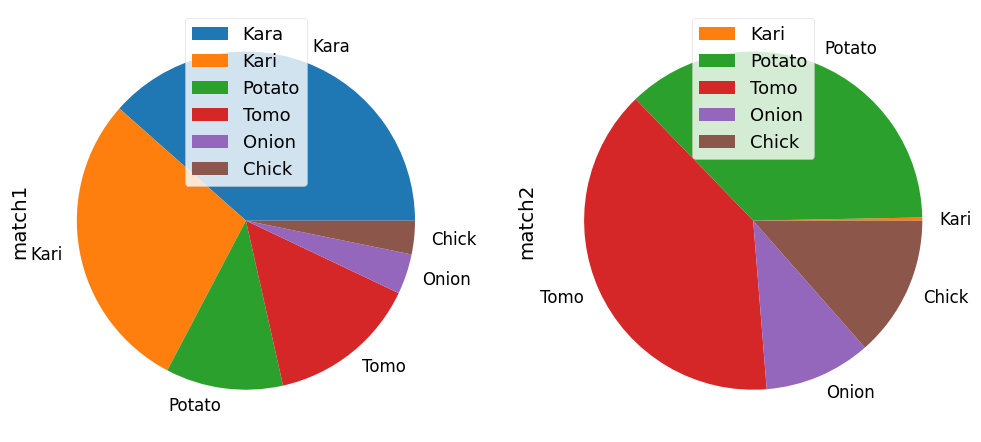

In [ ]:
df5 = pd.DataFrame(
    {
        'batsman': ['Kara','Kari','Potato','Tomo','Onion','Chick'],
        'match1':  [120,90,35,45,12,10],
        'match2':  [0,1,123,130,34,45],
        'match3':  [50,24,145,45,10,90]
    }
)
"""
shape: (6, 4)
┌─────────┬────────┬────────┬────────┐
│ batsman ┆ match1 ┆ match2 ┆ match3 │
│ ---     ┆ ---    ┆ ---    ┆ ---    │
│ str     ┆ i64    ┆ i64    ┆ i64    │
╞═════════╪════════╪════════╪════════╡
│ Kara    ┆ 120    ┆ 0      ┆ 50     │
│ Kari    ┆ 90     ┆ 1      ┆ 24     │
│ Potato  ┆ 35     ┆ 123    ┆ 145    │
│ Tomoto  ┆ 45     ┆ 130    ┆ 45     │
│ Onion   ┆ 12     ┆ 34     ┆ 10     │
│ Chick   ┆ 10     ┆ 45     ┆ 90     │
└─────────┴────────┴────────┴────────┘
"""

df5.iloc[:, [1, 2]].plot.pie(subplots=True, labels=df5['batsman'], fontsize=12, figsize=(12, 6))